# Air Quality Analysis for Greater Chennai Corporation using Exploratory Data Analysis
## Installing required libraries


In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from prophet import Prophet

## Importing dataset using Pandas

In [496]:
df = pd.read_excel("D:\Important\Projects\Air Quality Prediction Chennai\Dataset\Air_Quality_Data_Chennai.xlsx")

In [497]:
df

,Date of Sampling,Sulphur Dioxide (S02),Nitrogen Oxides (NO2),RSPM (<10g),PM 2.5,AQI,Station
0,2018-01-02,11.2,13.2,42,28.0,48,Kathiwakkam
1,2018-01-02,8.1,16.2,57,25.0,57,Anna Nagar
2,2018-01-02,9.2,19.7,86,NaN,86,Thiyagaraya Nagar
3,2018-01-03,7.4,14.4,51,23.0,51,Adyar
4,2018-01-03,11.0,13.0,64,NaN,64,Tiruvottiyur
...,...,...,...,...,...,...,...
4545,2023-12-28,17.4,22.1,55,30.0,55,Manali
4546,2023-12-28,16.1,19.2,52,26.0,52,Kathiwakkam
4547,2023-12-29,10.3,22.5,55,21.0,55,Anna Nagar
4548,2023-12-29,7.7,18.0,50,19.0,50,Adyar


In [498]:
df.head()

,Date of Sampling,Sulphur Dioxide (S02),Nitrogen Oxides (NO2),RSPM (<10g),PM 2.5,AQI,Station
0,2018-01-02,11.2,13.2,42,28.0,48,Kathiwakkam
1,2018-01-02,8.1,16.2,57,25.0,57,Anna Nagar
2,2018-01-02,9.2,19.7,86,NaN,86,Thiyagaraya Nagar
3,2018-01-03,7.4,14.4,51,23.0,51,Adyar
4,2018-01-03,11.0,13.0,64,NaN,64,Tiruvottiyur


## Feature Engineering

In [499]:
# Renaming columns for easy usage
df.columns=["Date","Sulphur_dioxide","Nitrogen_dioxide","PM_10","PM_2.5","AQI","Stations"]

In [500]:
df.head()

,Date,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5,AQI,Stations
0,2018-01-02,11.2,13.2,42,28.0,48,Kathiwakkam
1,2018-01-02,8.1,16.2,57,25.0,57,Anna Nagar
2,2018-01-02,9.2,19.7,86,NaN,86,Thiyagaraya Nagar
3,2018-01-03,7.4,14.4,51,23.0,51,Adyar
4,2018-01-03,11.0,13.0,64,NaN,64,Tiruvottiyur


### Importing an Another dataset which includes station type

In [501]:
df_type=pd.read_excel("D:\Important\Projects\Air Quality Prediction Chennai\Dataset\Stations.xlsx")

In [502]:
df_type

,Stations,Station Type
0,Adyar,Residential
1,Anna Nagar,Residential
2,Thiyagaraya Nagar,Commercial
3,Kilpauk,Mixed
4,Nungampakkam,Traffic Intersection
5,Kathiwakkam,Industrial
6,Manali,Industrial
7,Tiruvottiyur,Industrial


### Merging the Station type dataset which would give us detailed Analysis

In [503]:
df=pd.merge(df,df_type,on="Stations",how='left')

In [504]:
df.head()

,Date,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5,AQI,Stations,Station Type
0,2018-01-02,11.2,13.2,42,28.0,48,Kathiwakkam,Industrial
1,2018-01-02,8.1,16.2,57,25.0,57,Anna Nagar,Residential
2,2018-01-02,9.2,19.7,86,NaN,86,Thiyagaraya Nagar,Commercial
3,2018-01-03,7.4,14.4,51,23.0,51,Adyar,Residential
4,2018-01-03,11.0,13.0,64,NaN,64,Tiruvottiyur,Industrial


In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              4550 non-null   datetime64[ns]
 1   Sulphur_dioxide   4550 non-null   float64       
 2   Nitrogen_dioxide  4550 non-null   float64       
 3   PM_10             4550 non-null   int64         
 4   PM_2.5            4297 non-null   float64       
 5   AQI               4550 non-null   int64         
 6   Stations          4550 non-null   object        
 7   Station Type      4550 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 284.5+ KB


In [506]:
df.describe(exclude="datetime64[ns]")

,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5,AQI,Stations,Station Type
count,4550.000000,4550.000000,4550.000000,4297.000000,4550.000000,4550,4550
unique,NaN,NaN,NaN,NaN,NaN,8,5
top,NaN,NaN,NaN,NaN,NaN,Thiyagaraya Nagar,Industrial
freq,NaN,NaN,NaN,NaN,NaN,587,1680
mean,11.344593,18.564769,62.120659,27.858971,62.004176,NaN,NaN
std,3.851887,5.822284,28.467885,11.170952,27.132184,NaN,NaN
min,0.700000,6.000000,17.000000,7.000000,17.000000,NaN,NaN
25%,9.300000,16.100000,49.000000,21.000000,50.000000,NaN,NaN
50%,11.200000,18.400000,56.000000,26.000000,56.000000,NaN,NaN
75%,13.100000,20.900000,64.000000,32.000000,65.000000,NaN,NaN


In [507]:
### Checking for null values
df.isnull().sum()

Date                  0
Sulphur_dioxide       0
Nitrogen_dioxide      0
PM_10                 0
PM_2.5              253
AQI                   0
Stations              0
Station Type          0
dtype: int64

There are only 243 null values in PM2.5. Let us drop after some analysis. Droping may make some important data loss

In [508]:
df.describe()

,Date,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5,AQI
count,4550,4550.000000,4550.000000,4550.000000,4297.000000,4550.000000
mean,2021-01-11 12:43:59.472527616,11.344593,18.564769,62.120659,27.858971,62.004176
min,2018-01-02 00:00:00,0.700000,6.000000,17.000000,7.000000,17.000000
25%,2019-07-19 00:00:00,9.300000,16.100000,49.000000,21.000000,50.000000
50%,2021-01-21 00:00:00,11.200000,18.400000,56.000000,26.000000,56.000000
75%,2022-07-08 00:00:00,13.100000,20.900000,64.000000,32.000000,65.000000
max,2023-12-29 00:00:00,142.000000,221.000000,739.000000,432.000000,786.000000
std,NaN,3.851887,5.822284,28.467885,11.170952,27.132184


In [509]:
### Setting Date as Index column
df.set_index("Date",inplace=True)
df.head()

,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5,AQI,Stations,Station Type
Date,,,,,,,
2018-01-02,11.2,13.2,42,28.0,48,Kathiwakkam,Industrial
2018-01-02,8.1,16.2,57,25.0,57,Anna Nagar,Residential
2018-01-02,9.2,19.7,86,NaN,86,Thiyagaraya Nagar,Commercial
2018-01-03,7.4,14.4,51,23.0,51,Adyar,Residential
2018-01-03,11.0,13.0,64,NaN,64,Tiruvottiyur,Industrial


### Error Identification 
We need to check the data that is there is any errors in the data it is very important to exclude the error data in the dataframe. So, that i am going to plot the data as it shows the error in the dataframe


<Axes: xlabel='Date'>

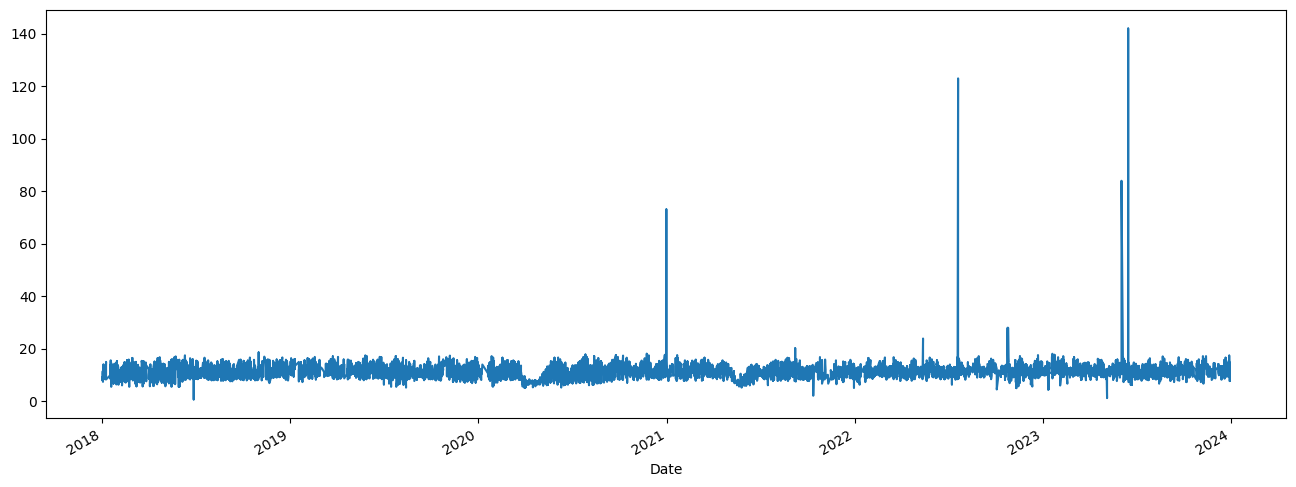

In [510]:
df["Sulphur_dioxide"].plot(figsize=(16,6))

Error identified
140 µg/m3, 120 µg/m3, 80 µg/m3 of sulphur dioxide is impossible in chennai region. It seems to be data error so the error data should be dropped

<Axes: xlabel='Date'>

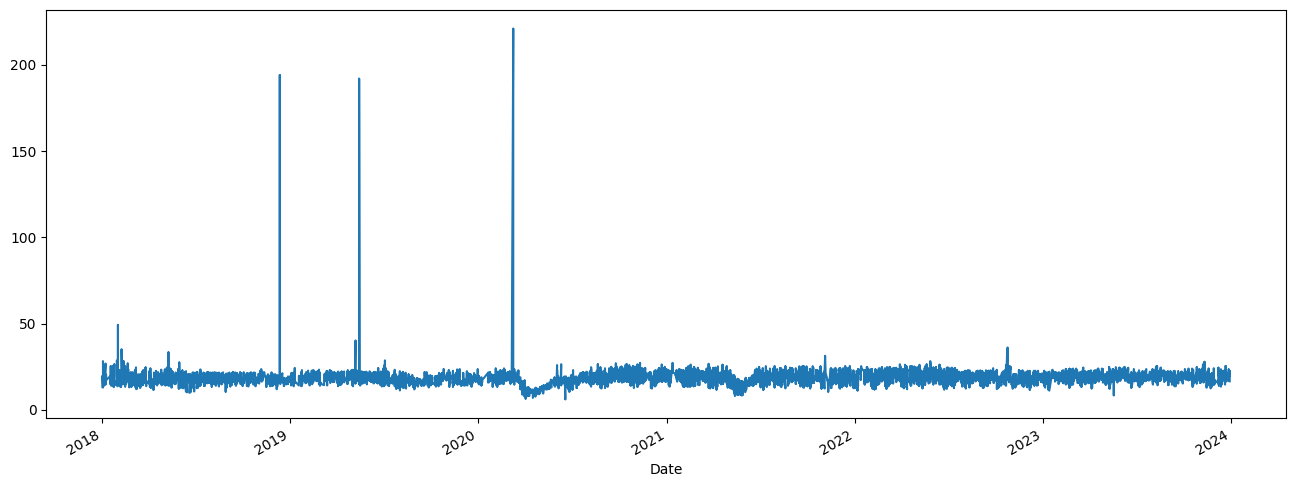

In [511]:
df["Nitrogen_dioxide"].plot(figsize=(16,6))

Error identified
220 µg/m3, 200 µg/m3, 190 µg/m3 of Nitrogen dioxide is impossible in chennai region. It seems to be data error so the error data should be dropped

<Axes: xlabel='Date'>

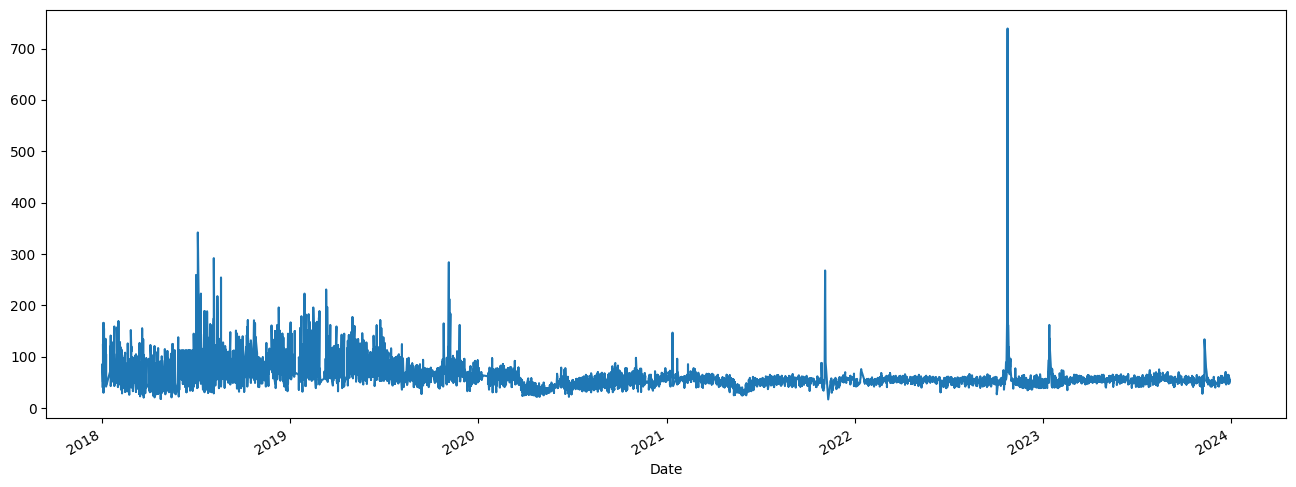

In [512]:
df["PM_10"].plot(figsize=(16,6))

Error identified
750 µg/m3 of PM_10 is impossible in chennai region. It seems to be data error so the error data should be dropped

<Axes: xlabel='Date'>

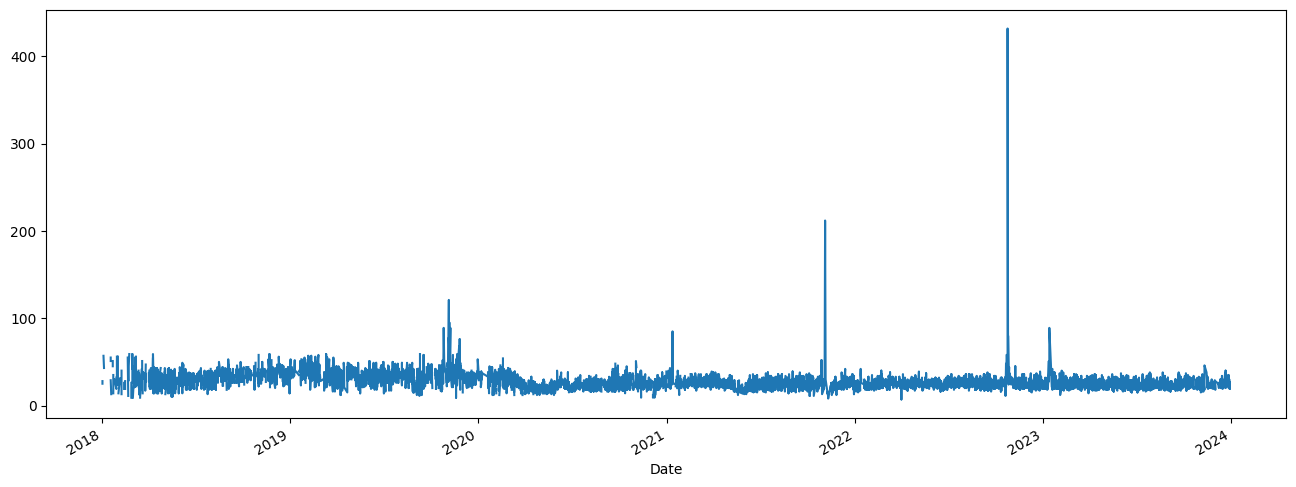

In [513]:
df["PM_2.5"].plot(figsize=(16,6))

Error identified
450 µg/m3 and 220 µg/m3 of PM_10 is impossible in chennai region. It seems to be data error so the error data should be dropped

The errors in the dataset needed to dropped are else it may affect analysis

### Error Rectification
We need to drop the error we just found

In [514]:
print(df["Sulphur_dioxide"].max())      # finding the maximum value of sulphur dioxide
# 142 µg/m3 of sulphur dioxide is not possible in chennai corporation so we need to drop that
print(df["Sulphur_dioxide"].idxmax())   # Finding the index of the maximum value of sulphur dioxide
df.drop(["2023-06-15"],inplace=True)    # dropping the index of the maximum value of sulphur dioxide
print(df["Sulphur_dioxide"].max())      # finding the maximum value of sulphur dioxide
# 123 µg/m3 of sulphur dioxide is not possible in chennai corporation so we need to drop that
print(df["Sulphur_dioxide"].idxmax())   # Finding the index of the maximum value of sulphur dioxide
df.drop("2022-07-20",inplace=True)      # dropping the index of the maximum value of sulphur dioxide
print(df["Sulphur_dioxide"].max())      # finding the maximum value of sulphur dioxide
# 84 µg/m3 of sulphur dioxide is not possible in chennai corporation so we need to drop that
print(df["Sulphur_dioxide"].idxmax())   # Finding the index of the maximum value of sulphur dioxide
df.drop("2023-06-02",inplace=True)      # dropping the index of the maximum value of sulphur dioxide
print(df["Sulphur_dioxide"].max())      # finding the maximum value of sulphur dioxide
# 73 µg/m3 of sulphur dioxide is not possible in chennai corporation so we need to drop that
print(df["Sulphur_dioxide"].idxmax())   # Finding the index of the maximum value of sulphur dioxide
df.drop("2020-12-31",inplace=True)      # dropping the index of the maximum value of sulphur dioxide
print(df["Sulphur_dioxide"].max())      # finding the maximum value of sulphur dioxide
# 28 µg/m3 of sulphur dioxide is possible in chennai corporation area 
print(df["Sulphur_dioxide"].min())      # finding the minimum value of sulphur dioxide
# 0.7 µg/m3 of sulphur dioxide is not possible in chennai corporation area so we need to drop that
print(df["Sulphur_dioxide"].idxmin())   # Finding the index of the minimum value of sulphur dioxide
df.drop("2018-06-28",inplace=True)      # dropping the index of the minimum value of sulphur dioxide

142.0
2023-06-15 00:00:00
123.0
2022-07-20 00:00:00
84.0
2023-06-02 00:00:00
73.1
2020-12-31 00:00:00
28.0
0.7
2018-06-28 00:00:00


C:\Users\ROG\AppData\Local\Temp\ipykernel_25856\2100389889.py:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df.drop(["2023-06-15"],inplace=True)    # dropping the index of the maximum value of sulphur dioxide
C:\Users\ROG\AppData\Local\Temp\ipykernel_25856\2100389889.py:8: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df.drop("2022-07-20",inplace=True)      # dropping the index of the maximum value of sulphur dioxide
C:\Users\ROG\AppData\Local\Temp\ipykernel_25856\2100389889.py:12: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. stri

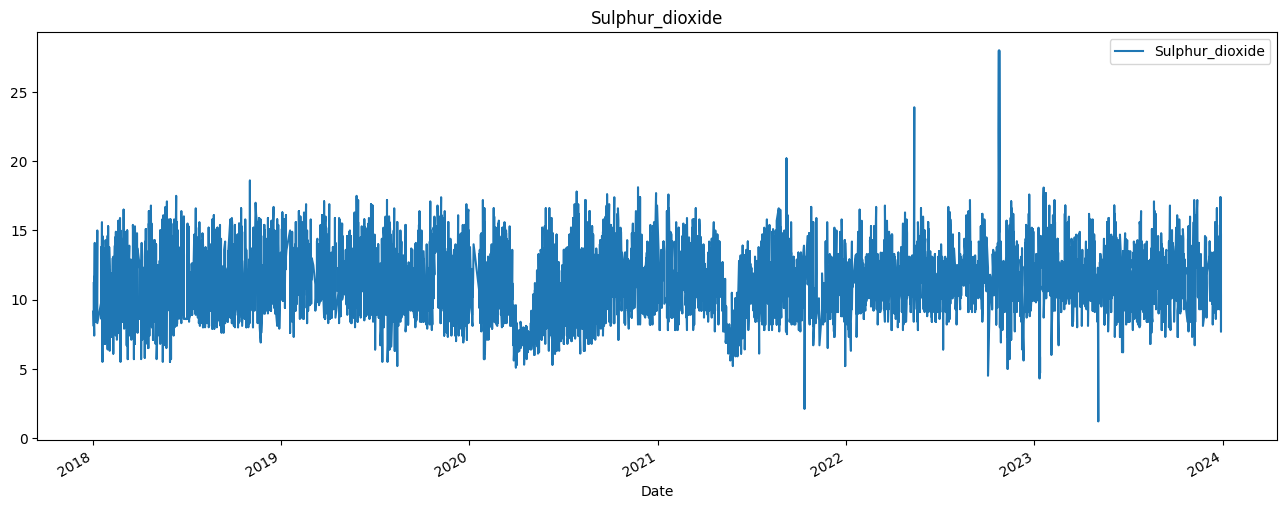

In [515]:
df["Sulphur_dioxide"].plot(figsize=(16,6))
plt.title("Sulphur_dioxide")
plt.legend()

In [516]:
print(df["Nitrogen_dioxide"].max())     # finding the maximum value of nitrogen dioxide
# 221 µg/m3 of nitrogen dioxide is not possible in chennai corporation so we need to drop that
print(df["Nitrogen_dioxide"].idxmax())  # Finding the index of the maximum value of nitrogen dioxide
df.drop(["2020-03-09"],inplace=True)    # dropping the index of the maximum value of nitrogen dioxide
print(df["Nitrogen_dioxide"].max())     # finding the maximum value of nitrogen dioxide
# 194 µg/m3 of nitrogen dioxide is not possible in chennai corporation so we need to drop that
print(df["Nitrogen_dioxide"].idxmax())  # Finding the index of the maximum value of nitrogen dioxide
df.drop(["2018-12-12"],inplace=True)    # dropping the index of the maximum value of nitrogen dioxide
print(df["Nitrogen_dioxide"].max())     # Finding the index of the maximum value of nitrogen dioxide
# 194 µg/m3 of nitrogen dioxide is not possible in chennai corporation so we need to drop that
print(df["Nitrogen_dioxide"].idxmax())  # Finding the index of the maximum value of nitrogen dioxide
df.drop(["2019-05-15"],inplace=True)    # dropping the index of the maximum value of nitrogen dioxide
print(df["Nitrogen_dioxide"].max())     # Finding the index of the maximum value of nitrogen dioxide
# 49.2 µg/m3 of nitrogen dioxide is possible in chennai corporation so we no need to drop that


221.0
2020-03-09 00:00:00
194.0
2018-12-12 00:00:00
192.0
2019-05-15 00:00:00
49.2


C:\Users\ROG\AppData\Local\Temp\ipykernel_25856\2174399294.py:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df.drop(["2020-03-09"],inplace=True)    # dropping the index of the maximum value of nitrogen dioxide
C:\Users\ROG\AppData\Local\Temp\ipykernel_25856\2174399294.py:8: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df.drop(["2018-12-12"],inplace=True)    # dropping the index of the maximum value of nitrogen dioxide
C:\Users\ROG\AppData\Local\Temp\ipykernel_25856\2174399294.py:12: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. st

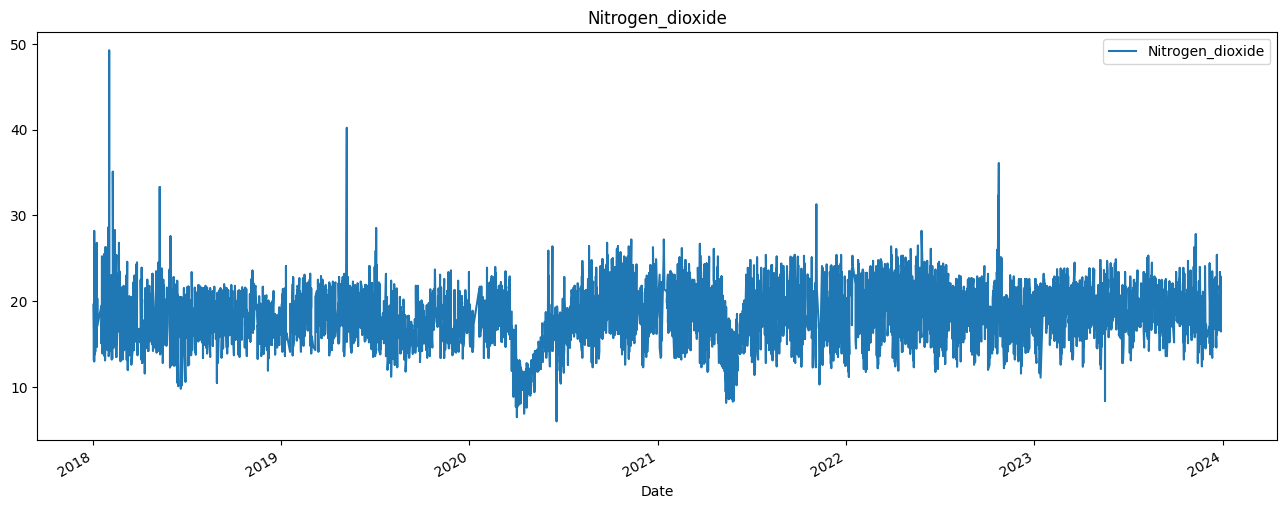

In [517]:
df["Nitrogen_dioxide"].plot(figsize=(16,6))
plt.title("Nitrogen_dioxide")
plt.legend()

In [518]:

print(df["PM_10"].max())                # finding the maximum value of PM_10
# 739 µg/m3 of PM_10 is not possible in chennai corporation so we need to drop that
print(df["PM_10"].idxmax())             # Finding the index of the maximum value of PM_10
df.drop(["2022-10-24"],inplace=True)    # dropping the index of the maximum value of PM_10
print(df["PM_10"].max())                # finding the maximum value of PM_10
# 342 µg/m3 of PM_10 is possible in chennai corporation so we no need to drop that


739
2022-10-24 00:00:00
342


C:\Users\ROG\AppData\Local\Temp\ipykernel_25856\2408670141.py:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df.drop(["2022-10-24"],inplace=True)    # dropping the index of the maximum value of PM_10


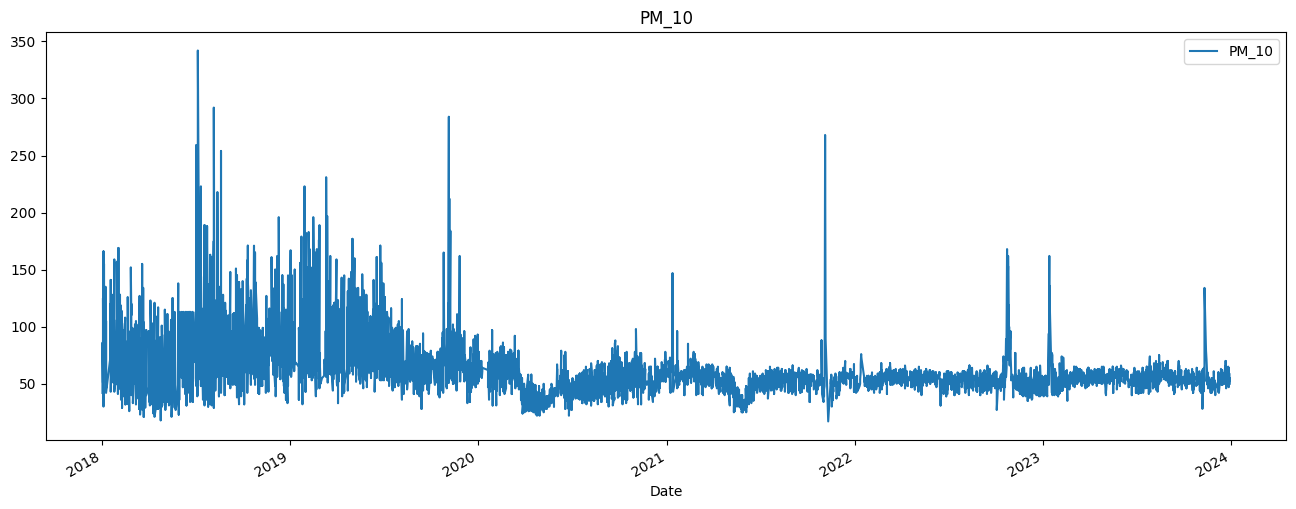

In [519]:
df["PM_10"].plot(figsize=(16,6))

plt.title("PM_10")
plt.legend()

In [520]:
print(df["PM_2.5"].max())             # finding the maximum value of PM_2.5
# 212 µg/m3 of PM_2.5 is not possible in chennai corporation so we need to drop that
print(df["PM_2.5"].idxmax())          # Finding the index of the maximum value of PM_2.5
df.drop(["2021-11-04"],inplace=True)  # dropping the index of the maximum value of PM_2.5
print(df["PM_2.5"].max())             # finding the maximum value of PM_2.5
# 121 µg/m3 of PM_2.5 is possible in chennai corporation so we no need to drop that



212.0
2021-11-04 00:00:00
121.0


C:\Users\ROG\AppData\Local\Temp\ipykernel_25856\392777096.py:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df.drop(["2021-11-04"],inplace=True)  # dropping the index of the maximum value of PM_2.5


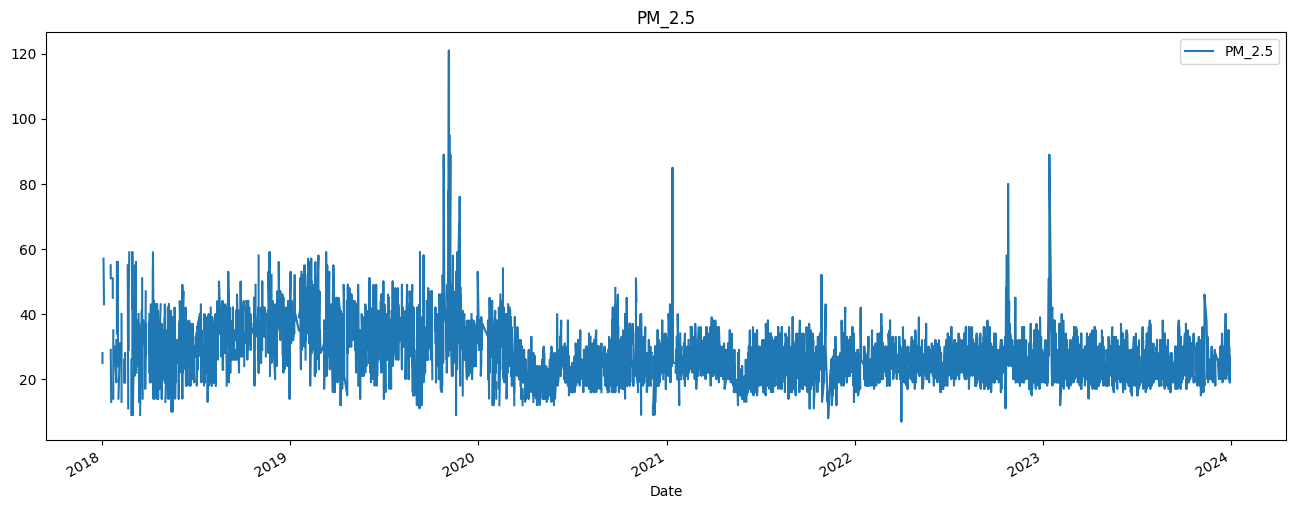

In [521]:
df["PM_2.5"].plot(figsize=(16,6))
plt.title("PM_2.5")
plt.legend()

## Analysis of air pollutants average concentration between stations


### Complete Analysis for 5 years
#### Feature Engineering

In [522]:
df.head()

,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5,AQI,Stations,Station Type
Date,,,,,,,
2018-01-02,11.2,13.2,42,28.0,48,Kathiwakkam,Industrial
2018-01-02,8.1,16.2,57,25.0,57,Anna Nagar,Residential
2018-01-02,9.2,19.7,86,NaN,86,Thiyagaraya Nagar,Commercial
2018-01-03,7.4,14.4,51,23.0,51,Adyar,Residential
2018-01-03,11.0,13.0,64,NaN,64,Tiruvottiyur,Industrial


In [523]:
# Finding the pollutants average separately based on the stations by grouping
Sulphur=df.groupby("Stations")[["Sulphur_dioxide"]].mean()   # gives sulphur dioxide average for every stations seperately
Nitrogen=df.groupby("Stations")[["Nitrogen_dioxide"]].mean() # gives nitrogen dioxide average for every stations seperately
Rspm=df.groupby("Stations")[["PM_10"]].mean()                # gives PM 10 average for every stations seperately
PM=df.groupby("Stations")[["PM_2.5"]].mean()                 # gives PM 2.5 average for every stations seperately


In [524]:
Sulphur.head()

,Sulphur_dioxide
Stations,
Adyar,8.962057
Anna Nagar,10.144563
Kathiwakkam,13.013475
Kilpauk,9.924605
Manali,14.008945


In [525]:
# Concatenating all the pollutants in a single data frame and storing them in variable
Station_all=pd.concat([Sulphur,Nitrogen,Rspm,PM],axis=1,join="inner")     # grouping all the pollutants based on their stations
Station_all_New=pd.concat([Sulphur,Nitrogen,Rspm,PM],axis=1,join="inner") # grouping all the pollutants based on their stations (copying in another variable)


In [526]:
Station_all.reset_index(inplace=True)
Station_all

,Stations,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5
0,Adyar,8.962057,17.871986,53.180851,21.230337
1,Anna Nagar,10.144563,20.038324,71.673797,27.384755
2,Kathiwakkam,13.013475,15.621454,53.358156,30.631902
3,Kilpauk,9.924605,19.637786,63.528998,25.126838
4,Manali,14.008945,16.887657,56.717352,32.199637
5,Nungampakkam,10.391084,20.442483,69.339161,26.535055
6,Thiyagaraya Nagar,10.627444,21.062779,70.867925,27.967033
7,Tiruvottiyur,13.092308,15.664652,54.987179,30.897839


In [530]:
Station_all_New

,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5
Stations,,,,
Adyar,8.962057,17.871986,53.180851,21.230337
Anna Nagar,10.144563,20.038324,71.673797,27.384755
Kathiwakkam,13.013475,15.621454,53.358156,30.631902
Kilpauk,9.924605,19.637786,63.528998,25.126838
Manali,14.008945,16.887657,56.717352,32.199637
Nungampakkam,10.391084,20.442483,69.339161,26.535055
Thiyagaraya Nagar,10.627444,21.062779,70.867925,27.967033
Tiruvottiyur,13.092308,15.664652,54.987179,30.897839


<Axes: ylabel='Stations'>

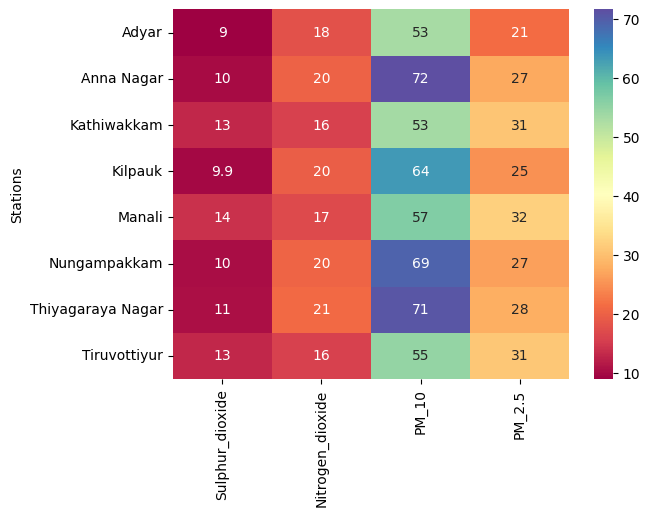

In [529]:
sns.heatmap(Station_all_New,annot=True,cmap="Spectral")

#### Visualisation
##### Pie Chart

([<matplotlib.patches.Wedge at 0x2db8abad9c0>,
 [Text(1.0507161628071087, 0.3255695704698237, 'Adyar'),
  Text(0.6049160899703087, 0.9187363735561109, 'Anna Nagar'),
  Text(-0.2602308949767223, 1.0687749441765624, 'Kathiwakkam'),
  Text(-0.9418899541496587, 0.5681930255396963, 'Kilpauk'),
  Text(-1.2534075818567687, -0.34491945979310634, 'Manali'),
  Text(-0.4991410790831811, -0.9802337390498644, 'Nungampakkam'),
  Text(0.3254757969264991, -1.0507452144145415, 'Thiyagaraya Nagar'),
  Text(0.9964893371191362, -0.4658422490584819, 'Tiruvottiyur')],
 [Text(0.5731179069856956, 0.17758340207444928, '9.6%'),
  Text(0.3299542308928956, 0.5011289310306059, '12.3%'),
  Text(-0.14194412453275762, 0.582968151369034, '13.8%'),
  Text(-0.5137581568089047, 0.30992346847619795, '11.3%'),
  Text(-0.7713277426810884, -0.21225812910345004, '14.5%'),
  Text(-0.27225877040900787, -0.5346729485726532, '12.0%'),
  Text(0.17753225286899948, -0.5731337533170225, '12.6%'),
  Text(0.5435396384286197, -0.2540957

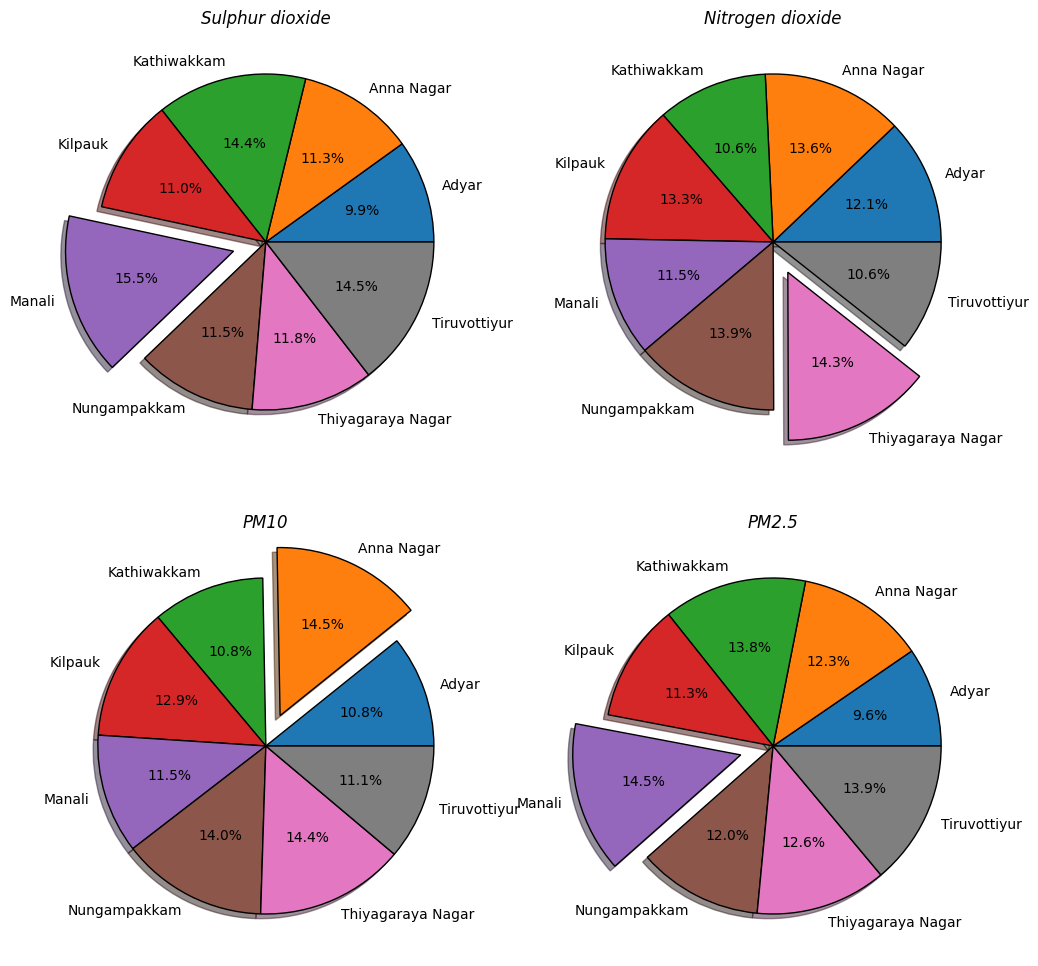

In [ ]:
explode_S_all=[0,0,0,0,0.2,0,0,0]    # explode for pie chart (sulphur_dioxide)
explode_N_all=[0,0,0,0,0,0,0.2,0]    # explode for pie chart (nitrogen_dioxide)
explode_PM10_all=[0,0.2,0,0,0,0,0,0] # explode for pie chart (PM_10)
explode_PM_all=[0,0,0,0,0.2,0,0,0]   # explode for pie chart (PM_2.5)

plt.figure(figsize=(12,12))          # fig size for subplots
plt.subplot(2,2,1)                   # defining subplots

# Pie chart for Sulphur dioxide
plt.title("Sulphur dioxide",fontstyle="italic")
plt.pie(x=Station_all["Sulphur_dioxide"],
        autopct="%1.1f%%",
        explode=explode_S_all,
        labels=Station_all["Stations"],
        shadow=True,
        wedgeprops={"edgecolor":"black",
                    "linewidth":1})

# Pie Chart for Nitrogen dioxide
plt.subplot(2,2,2)
plt.title("Nitrogen dioxide",fontstyle="italic")
plt.pie(x=Station_all["Nitrogen_dioxide"],
        autopct="%1.1f%%",
        explode=explode_N_all,
        labels=Station_all["Stations"],
        shadow=True,
        wedgeprops={"edgecolor":"black",
                    "linewidth":1})

# Pie Chart for PM 10
plt.subplot(2,2,3)
plt.title("PM10",fontstyle="italic")
plt.pie(x=Station_all["PM_10"],
        autopct="%1.1f%%",
        explode=explode_PM10_all,
        labels=Station_all["Stations"],
        shadow=True,
        wedgeprops={"edgecolor":"black",
                    "linewidth":1})

# Pie Chart for PM 2.5
plt.subplot(2,2,4)
plt.title("PM2.5",fontstyle="italic")
plt.pie(x=Station_all["PM_2.5"],
        autopct="%1.1f%%",
        explode=explode_PM_all,
        labels=Station_all["Stations"],
        shadow=True,
        wedgeprops={"edgecolor":"black",
                    "linewidth":1})

Pie Chart Observations

##### Bar Chart

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Adyar'),
  Text(1, 0, 'Anna Nagar'),
  Text(2, 0, 'Kathiwakkam'),
  Text(3, 0, 'Kilpauk'),
  Text(4, 0, 'Manali'),
  Text(5, 0, 'Nungampakkam'),
  Text(6, 0, 'Thiyagaraya Nagar'),
  Text(7, 0, 'Tiruvottiyur')])

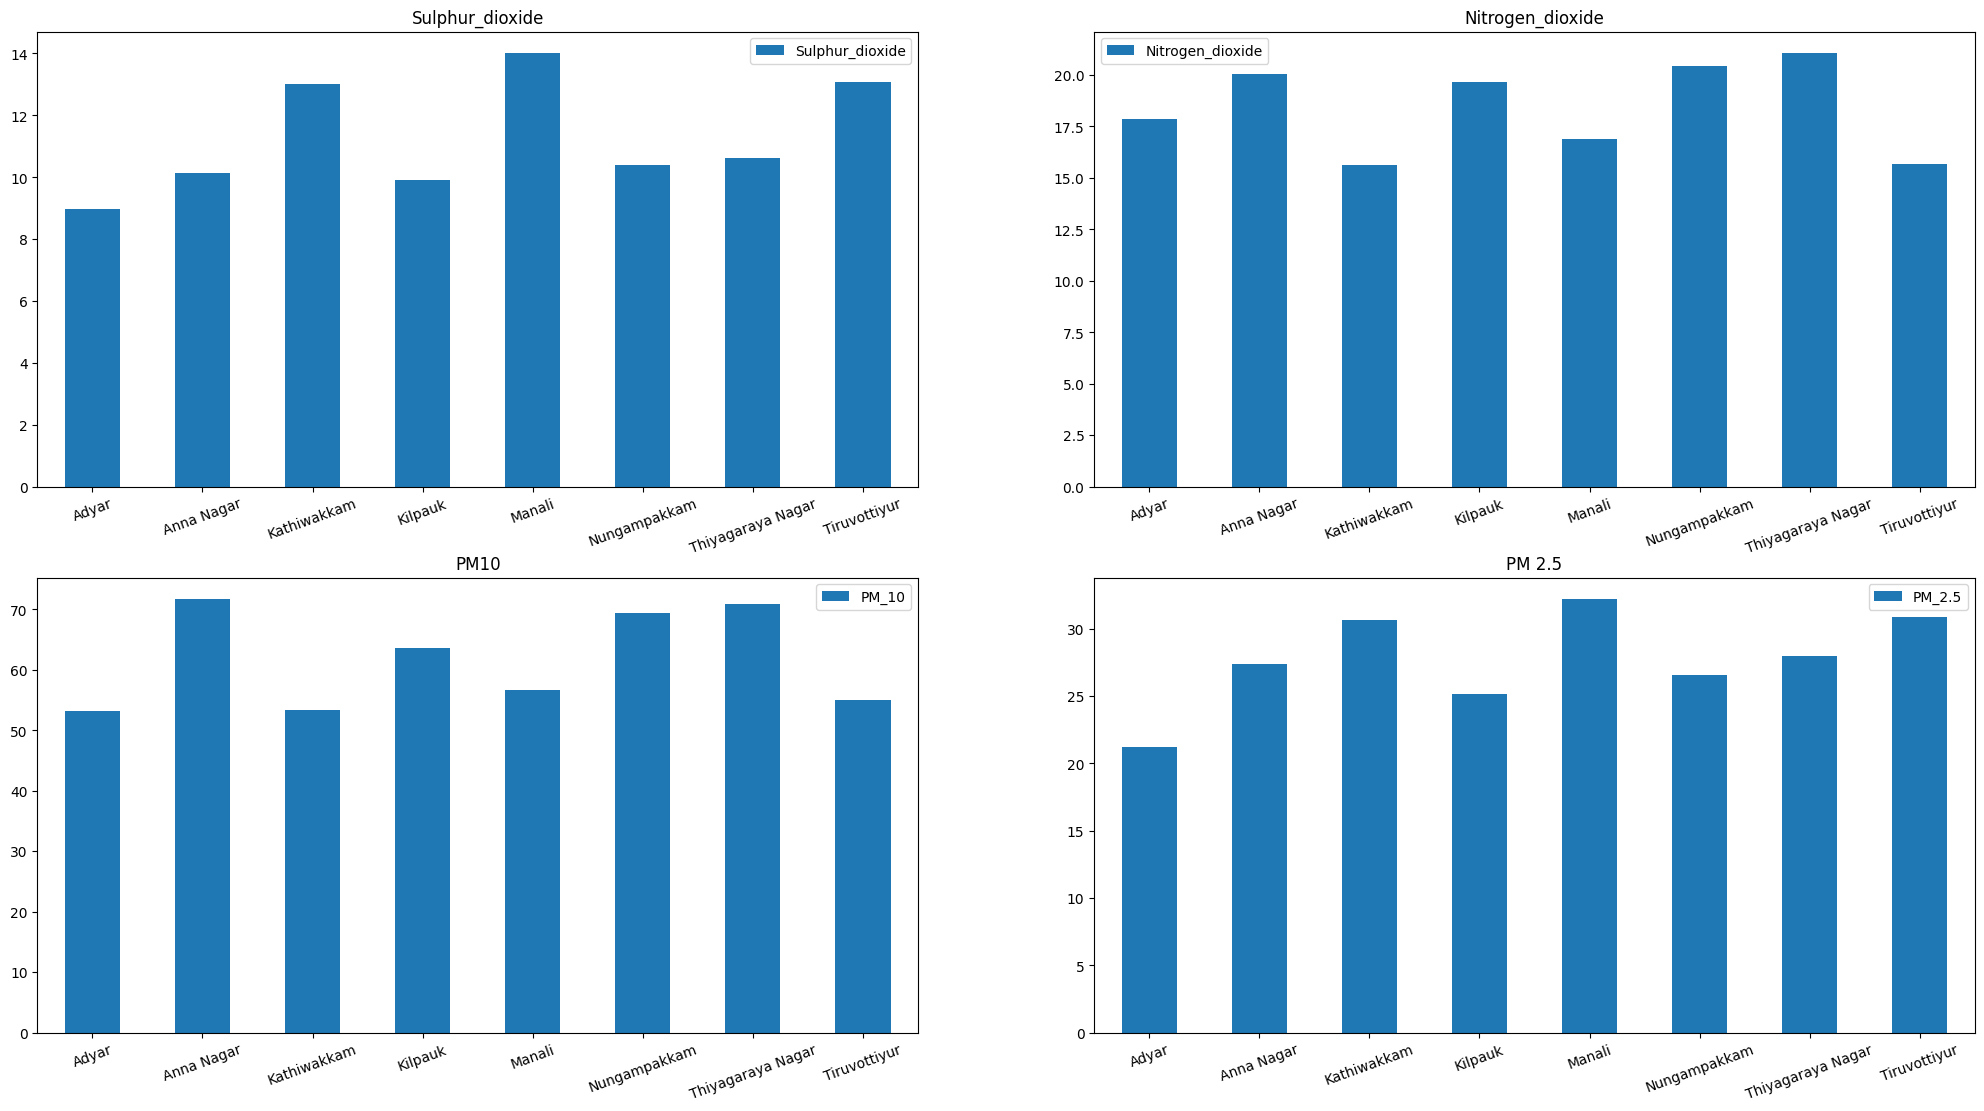

In [533]:
plt.figure(figsize=(25,13)) # fig size for subplots
plt.subplot(2,2,1)          # fig size for subplots

# Bar chart for sulphur dioxide
Station_all_New["Sulphur_dioxide"].plot(kind="bar",
                                        legend=True,
                                        xlabel="",
                                        title="Sulphur_dioxide")
plt.xticks(rotation=20)
plt.subplot(2,2,2)

# Bar chart for nitrogen dioxide
Station_all_New["Nitrogen_dioxide"].plot(kind="bar",
                                          legend=True,
                                          xlabel="",
                                          title="Nitrogen_dioxide")
plt.xticks(rotation=20)
plt.subplot(2,2,3)

# Bar chart for PM10
Station_all_New["PM_10"].plot(kind="bar",
                               legend=True,xlabel="",
                               title="PM10")
plt.xticks(rotation=20)
plt.subplot(2,2,4)

# Bar chart for PM2.5
Station_all_New["PM_2.5"].plot(kind="bar",
                                legend=True,xlabel="",
                                title="PM 2.5")
plt.xticks(rotation=20)

Bar chart Observations

First bar chart it is well shown that Manali, Kathiwakkam, Tiruvottiyur experiences high concentration of Sulphur dioxide because they are all the industrial areas. The main cause of sulphur dioxide emission is industrial emission so that these 3 stations experiences high concentration of SO2 than other stations.

Second bar chart it is well shown that Thiyagaraya Nagar experiences high concentration of Nitrogen dioxide than other stations. Behind Thiyagaraya Nagar, Anna Nagar and Nungampakkam faced high concentration level of Nitrogen dioxide.

Third bar chart it is well shown that Anna Nagar experiences high concentration of PM 10 than other stations. Behind Anna Nagar, Thiyagaraya Nagar and Nungampakkam faced high concentration level of PM 10.

From this bar chart it is well shown that Manali experiences high concentration of PM 2.5 than other stations. Behind Manali, Thiruvottiyur and Kathiwakkam faced high concentration level of PM 2.5.



This Bar graph shows that PM10 is the major pollutant in chennai city and sulphur dioxide is minor Pollutant. This graph also indicates their levels in all stations

### Yearly Analysis
#### Feature Engineering

In [ ]:
df_2018 = df["2018-01-01":"2018-12-31"]  # Seperating the 2018 data from complete dataset and storing in a variable "df_2018" 
df_2019 = df["2019-01-01":"2019-12-31"]  # Seperating the 2019 data from complete dataset and storing in a variable "df_2019"
df_2020 = df["2020-01-01":"2020-12-31"]  # Seperating the 2020 data from complete dataset and storing in a variable "df_2020"
df_2021 = df["2021-01-01":"2021-12-31"]  # Seperating the 2021 data from complete dataset and storing in a variable "df_2021"
df_2022 = df["2022-01-01":"2022-12-31"]  # Seperating the 2022 data from complete dataset and storing in a variable "df_2022"
df_2023 = df["2023-01-01":"2023-12-31"]  # Seperating the 2023 data from complete dataset and storing in a variable "df_2023"

In [ ]:
Sulphur_2018=df_2018.groupby("Stations")[["Sulphur_dioxide"]].mean()
Sulphur_2019=df_2019.groupby("Stations")[["Sulphur_dioxide"]].mean()
Sulphur_2020=df_2020.groupby("Stations")[["Sulphur_dioxide"]].mean()
Sulphur_2021=df_2021.groupby("Stations")[["Sulphur_dioxide"]].mean()
Sulphur_2022=df_2022.groupby("Stations")[["Sulphur_dioxide"]].mean()
Sulphur_2023=df_2023.groupby("Stations")[["Sulphur_dioxide"]].mean()
Nitrogen_2018=df_2018.groupby("Stations")[["Nitrogen_dioxide"]].mean()
Nitrogen_2019=df_2019.groupby("Stations")[["Nitrogen_dioxide"]].mean()
Nitrogen_2020=df_2020.groupby("Stations")[["Nitrogen_dioxide"]].mean()
Nitrogen_2021=df_2021.groupby("Stations")[["Nitrogen_dioxide"]].mean()
Nitrogen_2022=df_2022.groupby("Stations")[["Nitrogen_dioxide"]].mean()
Nitrogen_2023=df_2023.groupby("Stations")[["Nitrogen_dioxide"]].mean()
PM10_2018=df_2018.groupby("Stations")[["PM_10"]].mean()
PM10_2019=df_2019.groupby("Stations")[["PM_10"]].mean()
PM10_2020=df_2020.groupby("Stations")[["PM_10"]].mean()
PM10_2021=df_2021.groupby("Stations")[["PM_10"]].mean()
PM10_2022=df_2022.groupby("Stations")[["PM_10"]].mean()
PM10_2023=df_2023.groupby("Stations")[["PM_10"]].mean()
PM_2018=df_2018.groupby("Stations")[["PM_2.5"]].mean()
PM_2019=df_2019.groupby("Stations")[["PM_2.5"]].mean()
PM_2020=df_2020.groupby("Stations")[["PM_2.5"]].mean()
PM_2021=df_2021.groupby("Stations")[["PM_2.5"]].mean()
PM_2022=df_2022.groupby("Stations")[["PM_2.5"]].mean()
PM_2023=df_2023.groupby("Stations")[["PM_2.5"]].mean()


In [ ]:
Station_2018=pd.concat([Sulphur_2018,Nitrogen_2018,PM10_2018,PM_2018],axis=1,join="inner")
Station_2019=pd.concat([Sulphur_2019,Nitrogen_2019,PM10_2019,PM_2019],axis=1,join="inner")
Station_2020=pd.concat([Sulphur_2020,Nitrogen_2020,PM10_2020,PM_2020],axis=1,join="inner")
Station_2021=pd.concat([Sulphur_2021,Nitrogen_2021,PM10_2021,PM_2021],axis=1,join="inner")
Station_2022=pd.concat([Sulphur_2022,Nitrogen_2022,PM10_2022,PM_2022],axis=1,join="inner")
Station_2023=pd.concat([Sulphur_2023,Nitrogen_2023,PM10_2023,PM_2023],axis=1,join="inner")


In [ ]:
Station_2018_New=pd.concat([Sulphur_2018,Nitrogen_2018,PM10_2018,PM_2018],axis=1,join="inner")
Station_2019_New=pd.concat([Sulphur_2019,Nitrogen_2019,PM10_2019,PM_2019],axis=1,join="inner")
Station_2020_New=pd.concat([Sulphur_2020,Nitrogen_2020,PM10_2020,PM_2020],axis=1,join="inner")
Station_2021_New=pd.concat([Sulphur_2021,Nitrogen_2021,PM10_2021,PM_2021],axis=1,join="inner")
Station_2022_New=pd.concat([Sulphur_2022,Nitrogen_2022,PM10_2022,PM_2022],axis=1,join="inner")
Station_2023_New=pd.concat([Sulphur_2023,Nitrogen_2023,PM10_2023,PM_2023],axis=1,join="inner")


#### 2018 Analysis

In [ ]:
Station_2018

,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5
Stations,,,,
Adyar,7.893548,14.883871,65.752688,23.194805
Anna Nagar,8.967442,18.613953,121.651163,38.375000
Kathiwakkam,13.552128,16.294681,50.691489,31.414894
Kilpauk,9.320225,18.733708,86.820225,32.945205
Manali,14.220213,17.246809,53.319149,32.265957
Nungampakkam,9.729787,20.263830,103.031915,35.757576
Thiyagaraya Nagar,9.571111,21.182222,98.077778,34.084746
Tiruvottiyur,13.300000,15.866250,58.862500,34.362069


<Axes: title={'center': 'Air Pollutant concentrations in different stations in 2018'}, ylabel='Stations'>

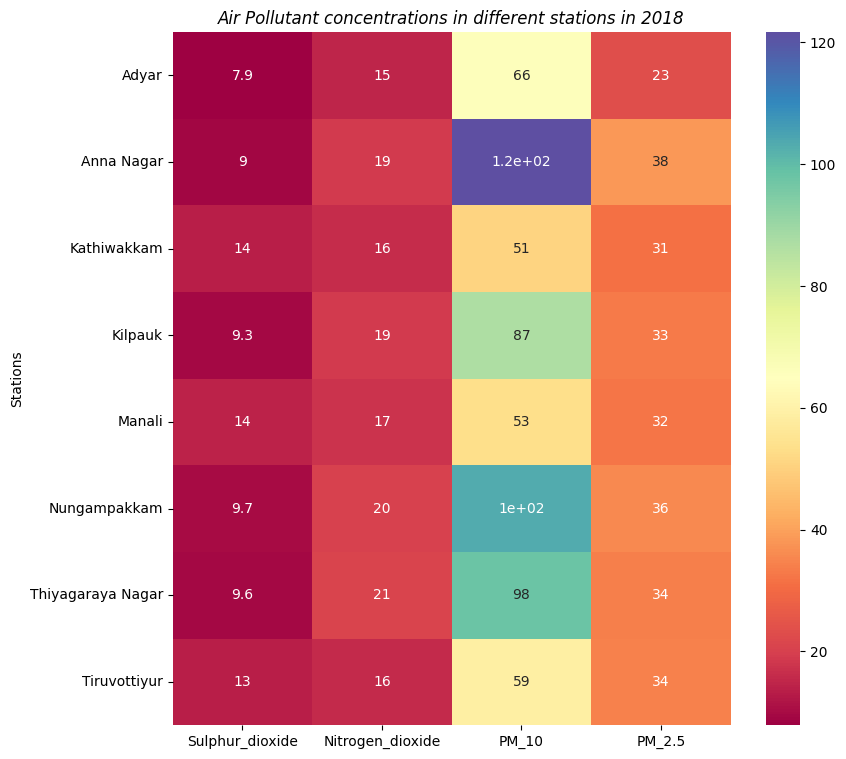

In [ ]:
plt.figure(figsize=(9,9))
plt.title(label="Air Pollutant concentrations in different stations in 2018",
          loc="center",
          fontstyle="italic")

sns.heatmap(Station_2018,annot=True,cmap="Spectral")

In [ ]:
Station_2018.reset_index(inplace=True)

In [ ]:
Station_2018

,Stations,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5
0,Adyar,7.893548,14.883871,65.752688,23.194805
1,Anna Nagar,8.967442,18.613953,121.651163,38.375000
2,Kathiwakkam,13.552128,16.294681,50.691489,31.414894
3,Kilpauk,9.320225,18.733708,86.820225,32.945205
4,Manali,14.220213,17.246809,53.319149,32.265957
5,Nungampakkam,9.729787,20.263830,103.031915,35.757576
6,Thiyagaraya Nagar,9.571111,21.182222,98.077778,34.084746
7,Tiruvottiyur,13.300000,15.866250,58.862500,34.362069


In [ ]:
Station_2018.describe()

,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5
count,8.000000,8.000000,8.000000,8.000000
mean,10.819307,17.885665,79.775863,32.800032
std,2.454444,2.197424,26.346169,4.446557
min,7.893548,14.883871,50.691489,23.194805
25%,9.232029,16.187573,57.476662,32.053191
50%,9.650449,17.930381,76.286456,33.514976
75%,13.363032,19.116238,99.316312,34.710946
max,14.220213,21.182222,121.651163,38.375000


([<matplotlib.patches.Wedge at 0x2db896adba0>,
 [Text(1.05785727315569, 0.3015592638796031, 'Adyar'),
  Text(0.6860757417348211, 1.1042192158276432, 'Anna Nagar'),
  Text(-0.3035798659761914, 1.0572791802423227, 'Kathiwakkam'),
  Text(-0.9542552472368193, 0.5471717491985463, 'Kilpauk'),
  Text(-1.0629980008237827, -0.28290501982934396, 'Manali'),
  Text(-0.5237671020059057, -0.9672993450097728, 'Nungampakkam'),
  Text(0.3667479506222515, -1.0370612039385037, 'Thiyagaraya Nagar'),
  Text(1.0082182049945285, -0.43988186040982763, 'Tiruvottiyur')],
 [Text(0.5770130580849218, 0.1644868712070562, '8.8%'),
  Text(0.4222004564521976, 0.6795195174323958, '14.6%'),
  Text(-0.16558901780519528, 0.5766977346776304, '12.0%'),
  Text(-0.5205028621291742, 0.29845731774466155, '12.6%'),
  Text(-0.5798170913584269, -0.15431182899782395, '12.3%'),
  Text(-0.28569114654867583, -0.5276178245507851, '13.6%'),
  Text(0.20004433670304625, -0.5656697476028202, '13.0%'),
  Text(0.5499372027242883, -0.23993556

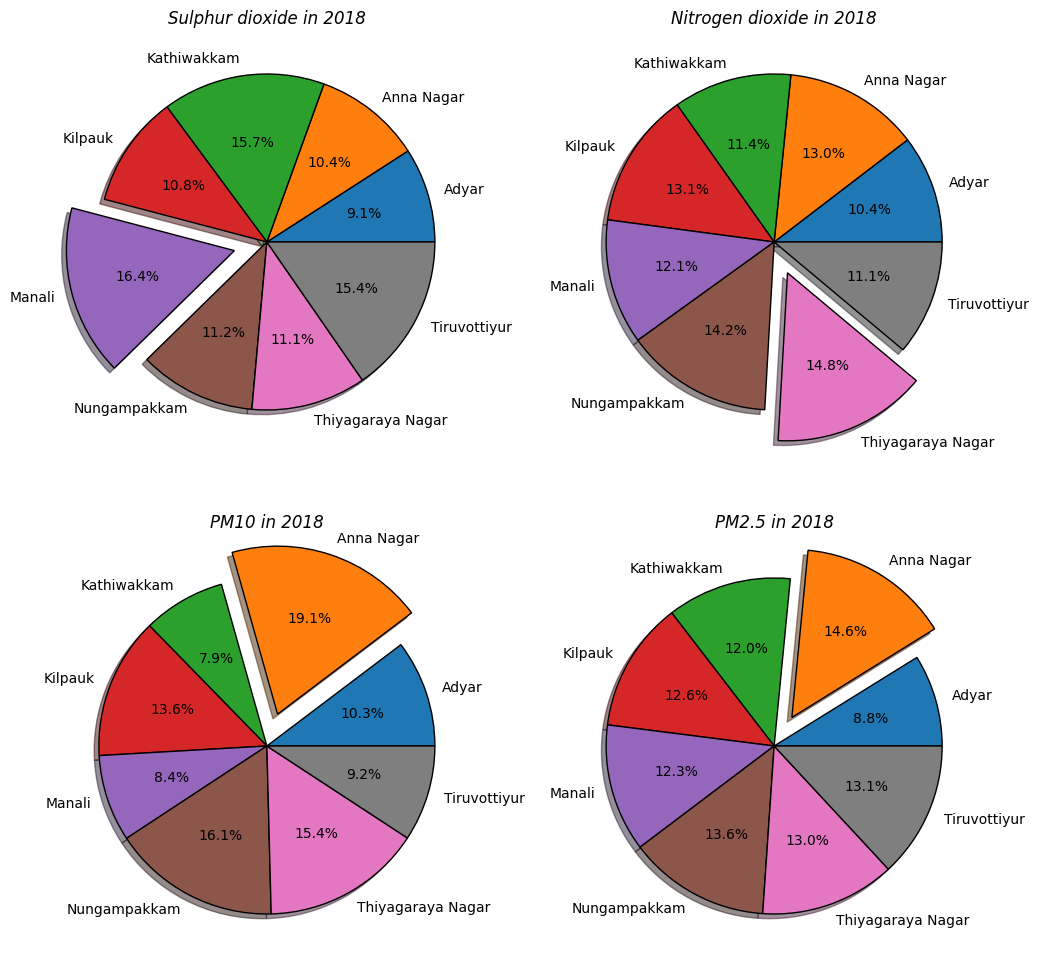

In [ ]:
explode_S_2018=[0,0,0,0,0.2,0,0,0]
explode_N_2018=[0,0,0,0,0,0,0.2,0]
explode_PM10_2018=[0,0.2,0,0,0,0,0,0]
explode_PM_2018=[0,0.2,0,0,0,0,0,0]

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title("Sulphur dioxide in 2018",fontstyle="italic")
plt.pie(x=Station_2018["Sulphur_dioxide"],
        autopct="%1.1f%%",
        explode=explode_S_2018,
        labels=Station_2018["Stations"],
        shadow=True,
        wedgeprops={"edgecolor":"black",
                    "linewidth":1})
plt.subplot(2,2,2)
plt.title("Nitrogen dioxide in 2018",fontstyle="italic")
plt.pie(x=Station_2018["Nitrogen_dioxide"],
        autopct="%1.1f%%",
        explode=explode_N_2018,
        labels=Station_2018["Stations"],
        shadow=True,
        wedgeprops={"edgecolor":"black",
                    "linewidth":1})
plt.subplot(2,2,3)
plt.title("PM10 in 2018",fontstyle="italic")
plt.pie(x=Station_2018["PM_10"],
        autopct="%1.1f%%",
        explode=explode_PM10_2018,
        labels=Station_2018["Stations"],
        shadow=True,
        wedgeprops={"edgecolor":"black",
                    "linewidth":1})
plt.subplot(2,2,4)
plt.title("PM2.5 in 2018",fontstyle="italic")
plt.pie(x=Station_2018["PM_2.5"],
        autopct="%1.1f%%",
        explode=explode_PM_2018,
        labels=Station_2018["Stations"],
        shadow=True,
        wedgeprops={"edgecolor":"black",
                    "linewidth":1})

<Axes: title={'center': 'Sulphur dioxide in 2018'}, xlabel='Stations', ylabel='Concentration'>

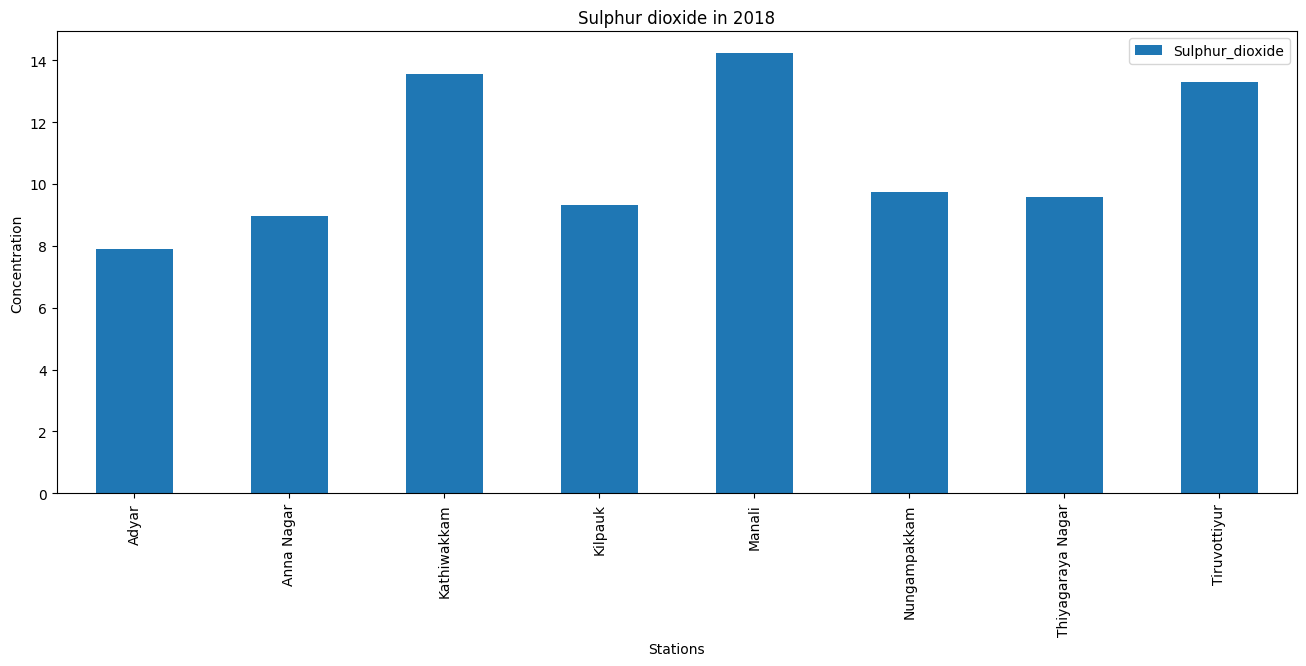

In [ ]:
Station_2018_New["Sulphur_dioxide"].plot(kind="bar",figsize=(16,6),legend=True,title="Sulphur dioxide in 2018",ylabel="Concentration")

#### 2019 Analysis

In [ ]:
Station_2019

,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5
Stations,,,,
Adyar,8.395238,16.379762,68.488095,27.929577
Anna Nagar,10.420000,19.247059,96.070588,36.073171
Kathiwakkam,13.669792,16.547917,59.677083,34.760417
Kilpauk,10.577778,19.753333,94.577778,36.240964
Manali,14.627660,17.638298,64.031915,36.585106
Nungampakkam,10.489796,19.507143,100.877551,34.597938
Thiyagaraya Nagar,10.743689,20.052427,94.864078,38.206186
Tiruvottiyur,13.597826,16.232609,60.402174,34.456522


<Axes: ylabel='Stations'>

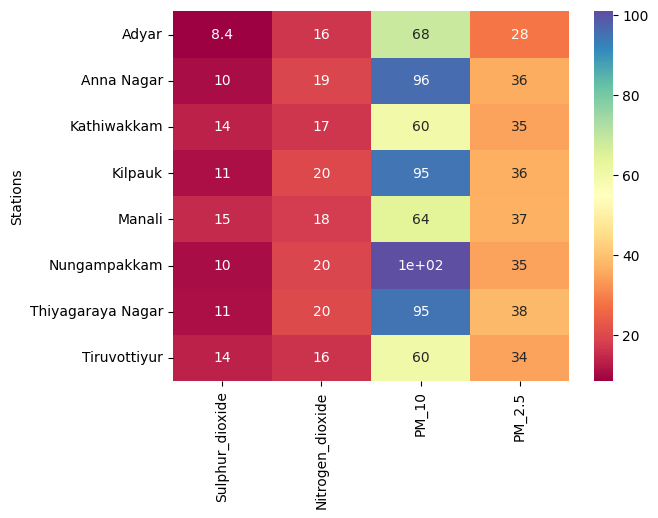

In [ ]:
sns.heatmap(Station_2019,annot=True,cmap="Spectral")

In [ ]:
Station_2019.reset_index(inplace=True)
Station_2019

,Stations,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5
0,Adyar,8.395238,16.379762,68.488095,27.929577
1,Anna Nagar,10.420000,19.247059,96.070588,36.073171
2,Kathiwakkam,13.669792,16.547917,59.677083,34.760417
3,Kilpauk,10.577778,19.753333,94.577778,36.240964
4,Manali,14.627660,17.638298,64.031915,36.585106
5,Nungampakkam,10.489796,19.507143,100.877551,34.597938
6,Thiyagaraya Nagar,10.743689,20.052427,94.864078,38.206186
7,Tiruvottiyur,13.597826,16.232609,60.402174,34.456522


In [ ]:
Station_2019.describe()

,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5
count,8.000000,8.000000,8.000000,8.000000
mean,11.565222,18.169818,79.873658,34.856235
std,2.141630,1.641897,18.174001,3.066497
min,8.395238,16.232609,59.677083,27.929577
25%,10.472347,16.505878,63.124480,34.562584
50%,10.660734,18.442678,81.532937,35.416794
75%,13.615817,19.568690,95.165705,36.326999
max,14.627660,20.052427,100.877551,38.206186


([<matplotlib.patches.Wedge at 0x2db89cb74c0>,
 [Text(1.0459912653505463, 0.3404442286342407, 'Adyar'),
  Text(0.560885308339964, 0.9462598326508337, 'Anna Nagar'),
  Text(-0.28593962831440217, 1.0621857318564498, 'Kathiwakkam'),
  Text(-0.9611385823088311, 0.5349884350127305, 'Kilpauk'),
  Text(-1.0467025380685608, -0.3382510854392533, 'Manali'),
  Text(-0.4846580495459703, -0.987474847786158, 'Nungampakkam'),
  Text(0.4627764480805976, -1.2148407134690153, 'Thiyagaraya Nagar'),
  Text(1.0181530306780182, -0.4163705154320688, 'Tiruvottiyur')],
 [Text(0.570540690191207, 0.18569685198231306, '10.0%'),
  Text(0.3059374409127076, 0.5161417269004547, '12.9%'),
  Text(-0.1559670699896739, 0.5793740355580634, '12.5%'),
  Text(-0.5242574085320896, 0.2918118736433075, '13.0%'),
  Text(-0.5709286571283059, -0.1845005920577745, '13.1%'),
  Text(-0.26435893611598377, -0.5386226442469952, '12.4%'),
  Text(0.284785506511137, -0.7475942852117017, '13.7%'),
  Text(0.5553561985516463, -0.2271111902356

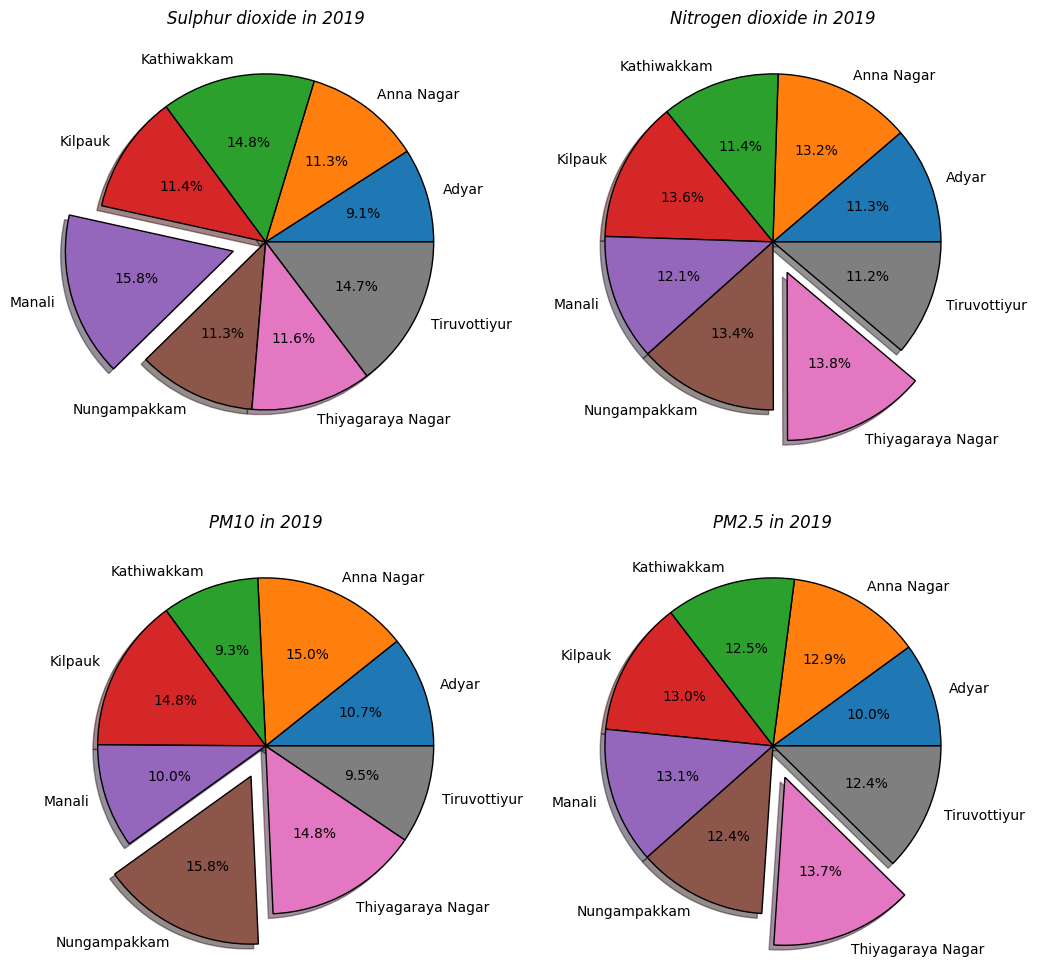

In [ ]:
explode_S_2019=[0,0,0,0,0.2,0,0,0]
explode_N_2019=[0,0,0,0,0,0,0.2,0]
explode_PM10_2019=[0,0,0,0,0,0.2,0,0]
explode_PM_2019=[0,0,0,0,0,0,0.2,0]

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title("Sulphur dioxide in 2019",fontstyle="italic")
plt.pie(x=Station_2019["Sulphur_dioxide"],
        autopct="%1.1f%%",
        explode=explode_S_2019,
        labels=Station_2019["Stations"],
        shadow=True,
        wedgeprops={"edgecolor":"black",
                    "linewidth":1})
plt.subplot(2,2,2)
plt.title("Nitrogen dioxide in 2019",fontstyle="italic")
plt.pie(x=Station_2019["Nitrogen_dioxide"],
        autopct="%1.1f%%",
        explode=explode_N_2019,
        labels=Station_2019["Stations"],
        shadow=True,
        wedgeprops={"edgecolor":"black",
                    "linewidth":1})
plt.subplot(2,2,3)
plt.title("PM10 in 2019",fontstyle="italic")
plt.pie(x=Station_2019["PM_10"],
        autopct="%1.1f%%",
        explode=explode_PM10_2019,
        labels=Station_2019["Stations"],
        shadow=True,
        wedgeprops={"edgecolor":"black",
                    "linewidth":1})
plt.subplot(2,2,4)
plt.title("PM2.5 in 2019",fontstyle="italic")
plt.pie(x=Station_2019["PM_2.5"],
        autopct="%1.1f%%",
        explode=explode_PM_2019,
        labels=Station_2019["Stations"],
        shadow=True,
        wedgeprops={"edgecolor":"black",
                    "linewidth":1})

In [ ]:
Station_2019

,Stations,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5
0,Adyar,8.395238,16.379762,68.488095,27.929577
1,Anna Nagar,10.420000,19.247059,96.070588,36.073171
2,Kathiwakkam,13.669792,16.547917,59.677083,34.760417
3,Kilpauk,10.577778,19.753333,94.577778,36.240964
4,Manali,14.627660,17.638298,64.031915,36.585106
5,Nungampakkam,10.489796,19.507143,100.877551,34.597938
6,Thiyagaraya Nagar,10.743689,20.052427,94.864078,38.206186
7,Tiruvottiyur,13.597826,16.232609,60.402174,34.456522


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Adyar'),
  Text(1, 0, 'Anna Nagar'),
  Text(2, 0, 'Kathiwakkam'),
  Text(3, 0, 'Kilpauk'),
  Text(4, 0, 'Manali'),
  Text(5, 0, 'Nungampakkam'),
  Text(6, 0, 'Thiyagaraya Nagar'),
  Text(7, 0, 'Tiruvottiyur')])

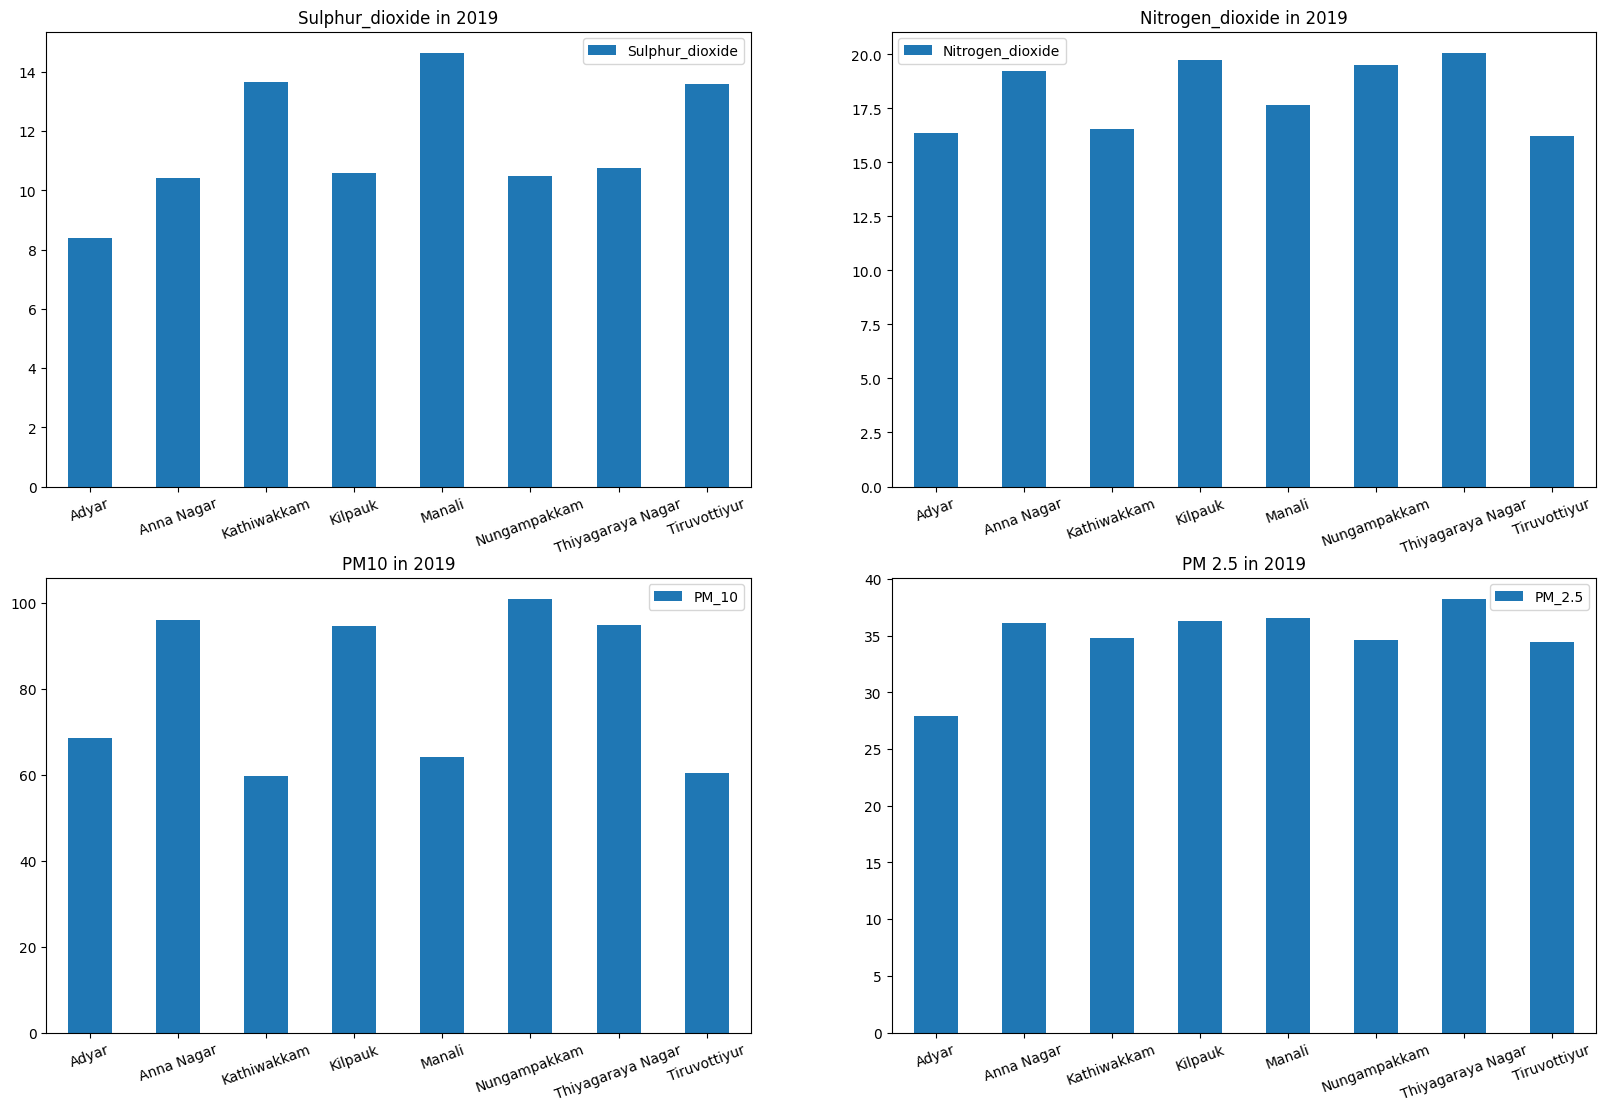

In [ ]:
plt.figure(figsize=(20,13))
plt.subplot(2,2,1)
Station_2019_New["Sulphur_dioxide"].plot(kind="bar",legend=True,xlabel="",title="Sulphur_dioxide in 2019")
plt.xticks(rotation=20)
plt.subplot(2,2,2)
Station_2019_New["Nitrogen_dioxide"].plot(kind="bar",legend=True,xlabel="",title="Nitrogen_dioxide in 2019")
plt.xticks(rotation=20)
plt.subplot(2,2,3)
Station_2019_New["PM_10"].plot(kind="bar",legend=True,xlabel="",title="PM10 in 2019")
plt.xticks(rotation=20)
plt.subplot(2,2,4)
Station_2019_New["PM_2.5"].plot(kind="bar",legend=True,xlabel="",title="PM 2.5 in 2019")
plt.xticks(rotation=20)

([<matplotlib.patches.Wedge at 0x2db8a98be50>,
 [Text(1.0459912653505463, 0.3404442286342407, 'Adyar'),
  Text(0.560885308339964, 0.9462598326508337, 'Anna Nagar'),
  Text(-0.28593962831440217, 1.0621857318564498, 'Kathiwakkam'),
  Text(-0.9611385823088311, 0.5349884350127305, 'Kilpauk'),
  Text(-1.0467025380685608, -0.3382510854392533, 'Manali'),
  Text(-0.4846580495459703, -0.987474847786158, 'Nungampakkam'),
  Text(0.4627764480805976, -1.2148407134690153, 'Thiyagaraya Nagar'),
  Text(1.0181530306780182, -0.4163705154320688, 'Tiruvottiyur')],
 [Text(0.570540690191207, 0.18569685198231306, '10.0%'),
  Text(0.3059374409127076, 0.5161417269004547, '12.9%'),
  Text(-0.1559670699896739, 0.5793740355580634, '12.5%'),
  Text(-0.5242574085320896, 0.2918118736433075, '13.0%'),
  Text(-0.5709286571283059, -0.1845005920577745, '13.1%'),
  Text(-0.26435893611598377, -0.5386226442469952, '12.4%'),
  Text(0.284785506511137, -0.7475942852117017, '13.7%'),
  Text(0.5553561985516463, -0.2271111902356

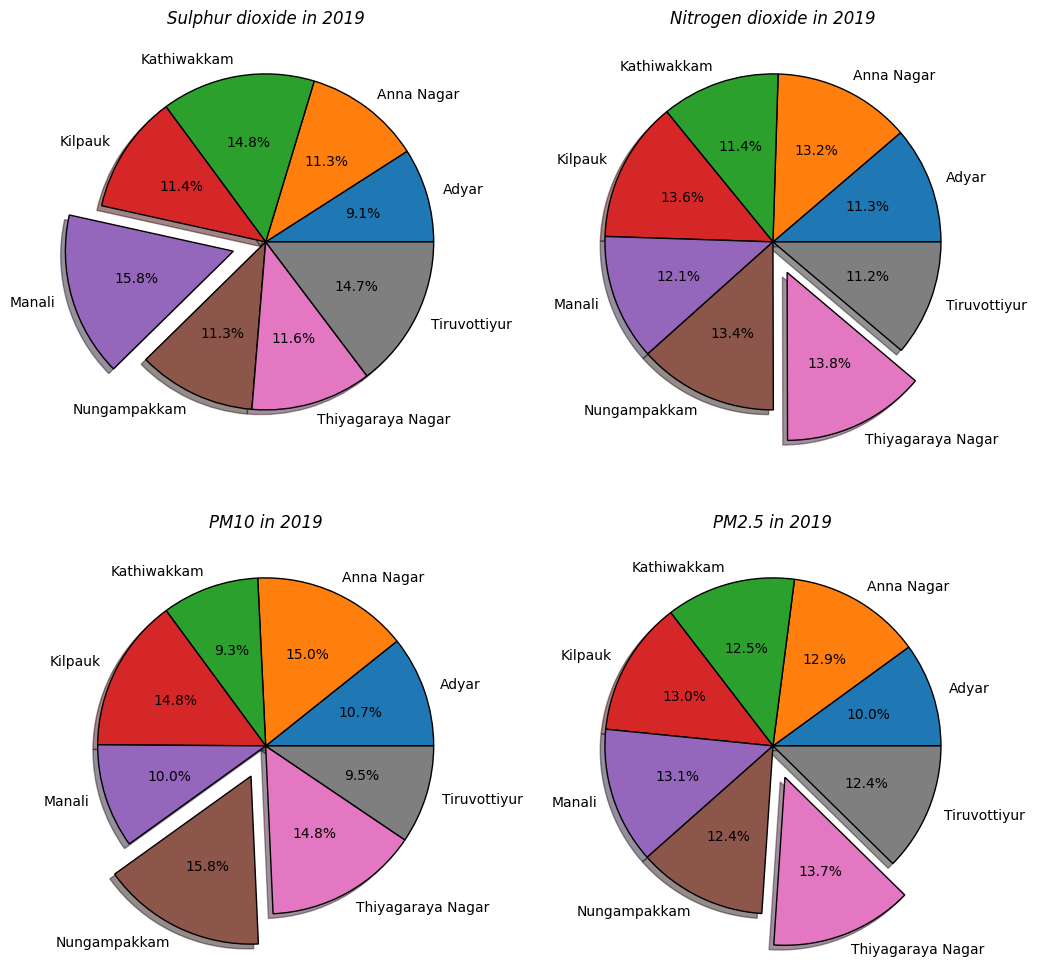

In [ ]:
explode_S_2019=[0,0,0,0,0.2,0,0,0]
explode_N_2019=[0,0,0,0,0,0,0.2,0]
explode_PM10_2019=[0,0,0,0,0,0.2,0,0]
explode_PM_2019=[0,0,0,0,0,0,0.2,0]

plt.figure(figsize=(12,12))
plt.subplot(2,2,1,)
plt.title("Sulphur dioxide in 2019",fontstyle="italic")
plt.pie(x=Station_2019["Sulphur_dioxide"],
        autopct="%1.1f%%",
        explode=explode_S_2019,
        labels=Station_2019["Stations"],
        shadow=True,
        wedgeprops={"edgecolor":"black",
                    "linewidth":1})
plt.subplot(2,2,2)
plt.title("Nitrogen dioxide in 2019",fontstyle="italic")
plt.pie(x=Station_2019["Nitrogen_dioxide"],
        autopct="%1.1f%%",
        explode=explode_N_2019,
        labels=Station_2019["Stations"],
        shadow=True,
        wedgeprops={"edgecolor":"black",
                    "linewidth":1})
plt.subplot(2,2,3)
plt.title("PM10 in 2019",fontstyle="italic")
plt.pie(x=Station_2019["PM_10"],
        autopct="%1.1f%%",
        explode=explode_PM10_2019,
        labels=Station_2019["Stations"],
        shadow=True,
        wedgeprops={"edgecolor":"black",
                    "linewidth":1})
plt.subplot(2,2,4)
plt.title("PM2.5 in 2019",fontstyle="italic")
plt.pie(x=Station_2019["PM_2.5"],
        autopct="%1.1f%%",
        explode=explode_PM_2019,
        labels=Station_2019["Stations"],
        shadow=True,
        wedgeprops={"edgecolor":"black",
                    "linewidth":1})


## Taking down the Stations seperately for Analysis

### Splitting the dataset by station name and storing in the variable of Station name

In [ ]:
a=['Adyar']              #Saving Adyar in variable "a"
b=['Anna Nagar']         #Saving Anna nagar in variable "b"
c=['Thiyagaraya Nagar']  #Saving Thiyagaraya Nagar in variable "c"
d=['Kilpauk']            #Saving Kilpauk in variable "d"
e=['Nungampakkam']       #Saving Nungampakkam in variable "e"
f=['Kathiwakkam']        #Saving Kathiwakkam in variable "f"
g=['Manali']             #Saving Manali in variable "g"
h=['Tiruvottiyur']       #Saving Kilpauk in variable "h"

Adyar=df[df['Stations'].isin(a)].reset_index()               #Seperating Adyar station data from whole data and storing it in variable "Adyar"
Anna_Nagar=df[df['Stations'].isin(b)].reset_index()          #Seperating Anna Nagar station data from whole data and storing it in variable "Anna_Nagar"
Thiyagaraya_Nagar=df[df['Stations'].isin(c)].reset_index()   #Seperating Thiyagaraya Nagar station data from whole data and storing it in variable "Thiyagaraya_Nagar"
Kilpauk=df[df['Stations'].isin(d)].reset_index()             #Seperating Kilpauk station data from whole data and storing it in variable "Kilpauk"
Nungampakkam=df[df['Stations'].isin(e)].reset_index()        #Seperating Nungampakkam station data from whole data and storing it in variable "Nungampakkam"
Kathiwakkam=df[df['Stations'].isin(f)].reset_index()         #Seperating Kathiwakkam station data from whole data and storing it in variable "Kathiwakkam"
Manali=df[df['Stations'].isin(g)].reset_index()              #Seperating Manali station data from whole data and storing it in variable "Manali"
Tiruvottiyur=df[df['Stations'].isin(h)].reset_index()        #Seperating Tiruvottiyur station data from whole data and storing it in variable "Tiruvottiyur"


In [ ]:
Adyar.tail()

,Date,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5,AQI,Stations,Station Type
559,2023-12-15,10.1,21.0,49,19.0,49,Adyar,Residential
560,2023-12-20,12.1,19.4,50,22.0,50,Adyar,Residential
561,2023-12-22,9.3,19.9,46,21.0,46,Adyar,Residential
562,2023-12-27,10.5,21.6,47,20.0,47,Adyar,Residential
563,2023-12-29,7.7,18.0,50,19.0,50,Adyar,Residential


In [ ]:

Adyar.tail()

,Date,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5,AQI,Stations,Station Type
559,2023-12-15,10.1,21.0,49,19.0,49,Adyar,Residential
560,2023-12-20,12.1,19.4,50,22.0,50,Adyar,Residential
561,2023-12-22,9.3,19.9,46,21.0,46,Adyar,Residential
562,2023-12-27,10.5,21.6,47,20.0,47,Adyar,Residential
563,2023-12-29,7.7,18.0,50,19.0,50,Adyar,Residential


In [ ]:
Adyar=Adyar.dropna().reset_index()

In [ ]:
Adyar.drop(columns="index")

,Date,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5,AQI,Stations,Station Type
0,2018-01-03,7.4,14.4,51,23.0,51,Adyar,Residential
1,2018-01-09,8.3,17.1,42,13.0,42,Adyar,Residential
2,2018-01-19,5.5,13.9,63,13.0,63,Adyar,Residential
3,2018-01-23,6.8,15.4,54,14.0,54,Adyar,Residential
4,2018-01-29,6.4,15.3,64,19.0,64,Adyar,Residential
...,...,...,...,...,...,...,...,...
529,2023-12-15,10.1,21.0,49,19.0,49,Adyar,Residential
530,2023-12-20,12.1,19.4,50,22.0,50,Adyar,Residential
531,2023-12-22,9.3,19.9,46,21.0,46,Adyar,Residential
532,2023-12-27,10.5,21.6,47,20.0,47,Adyar,Residential


In [ ]:
Adyar.head(424)

,index,Date,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5,AQI,Stations,Station Type
0,0,2018-01-03,7.4,14.4,51,23.0,51,Adyar,Residential
1,1,2018-01-09,8.3,17.1,42,13.0,42,Adyar,Residential
2,2,2018-01-19,5.5,13.9,63,13.0,63,Adyar,Residential
3,3,2018-01-23,6.8,15.4,54,14.0,54,Adyar,Residential
4,4,2018-01-29,6.4,15.3,64,19.0,64,Adyar,Residential
...,...,...,...,...,...,...,...,...,...
419,449,2022-11-16,10.3,20.7,48,22.0,48,Adyar,Residential
420,450,2022-11-18,10.6,20.2,46,21.0,46,Adyar,Residential
421,451,2022-11-23,9.1,19.4,45,20.0,45,Adyar,Residential
422,452,2022-11-25,10.3,21.6,47,19.0,47,Adyar,Residential


In [ ]:
Adyar.isnull().sum()

index               0
Date                0
Sulphur_dioxide     0
Nitrogen_dioxide    0
PM_10               0
PM_2.5              0
AQI                 0
Stations            0
Station Type        0
dtype: int64

In [ ]:
Adyar_Pol=Adyar.groupby(["Sulphur_dioxide","Nitrogen_dioxide","PM_10","PM_2.5"]).size().reset_index()
Adyar_Pol.tail()

,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5,0
529,13.1,22.7,62,16.0,1
530,13.1,25.4,60,24.0,1
531,13.2,21.3,51,18.0,1
532,13.3,21.4,53,20.0,1
533,13.4,22.4,50,26.0,1


In [ ]:
Adyar_Pol.columns

Index(['Sulphur_dioxide', 'Nitrogen_dioxide', 'PM_10', 'PM_2.5', 0], dtype='object')

In [ ]:
Adyar_Pol=Adyar_Pol.drop(columns=0)

In [ ]:
Adyar_Pol.describe()

,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5
count,534.000000,534.000000,534.000000,534.000000
mean,8.985581,17.997191,52.617978,21.230337
std,1.629972,3.217461,20.944224,7.932959
min,5.200000,9.200000,21.000000,9.000000
25%,8.000000,15.900000,43.000000,18.000000
50%,9.000000,18.400000,48.500000,20.000000
75%,10.100000,20.300000,54.750000,22.000000
max,13.400000,40.200000,212.000000,95.000000


In [ ]:
Adyar_Pol['Sulphur_dioxide'].idxmax()



533

In [ ]:
Adyar_Pol=Adyar_Pol.drop(index= Adyar_Pol['Sulphur_dioxide'].idxmax())

In [ ]:
Adyar_Pol['Nitrogen_dioxide'].idxmax()

355

In [ ]:
Adyar_Pol=Adyar_Pol.drop(index= Adyar_Pol['Nitrogen_dioxide'].idxmax())

In [ ]:
Adyar_Pol['PM_10'].idxmax()


np.int64(169)

In [ ]:
Adyar_Pol=Adyar_Pol.drop(index= Adyar_Pol['PM_10'].idxmax())

In [ ]:
Adyar_Pol['PM_2.5'].idxmax()


np.int64(296)

In [ ]:
Adyar_Pol=Adyar_Pol.drop(index= Adyar_Pol['PM_2.5'].idxmax())

In [ ]:
Adyar_Pol.describe()

,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5
count,530.000000,530.000000,530.000000,530.000000
mean,8.976981,17.960755,51.996226,20.926415
std,1.624284,3.067047,18.912693,6.624999
min,5.200000,9.200000,21.000000,9.000000
25%,8.000000,15.900000,43.000000,18.000000
50%,9.000000,18.400000,48.000000,20.000000
75%,10.100000,20.300000,54.000000,22.000000
max,13.300000,33.300000,177.000000,59.000000


In [ ]:
Adyar_Pol=Adyar_Pol.drop(index= Adyar_Pol['Sulphur_dioxide'].idxmax())
Adyar_Pol=Adyar_Pol.drop(index= Adyar_Pol['Nitrogen_dioxide'].idxmax())

In [ ]:
Adyar_Pol.describe()

,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5
count,528.000000,528.000000,528.000000,528.000000
mean,8.967992,17.925189,51.910985,20.909091
std,1.616300,2.995378,18.851100,6.622891
min,5.200000,9.200000,21.000000,9.000000
25%,8.000000,15.900000,43.000000,18.000000
50%,9.000000,18.400000,48.000000,20.000000
75%,10.100000,20.300000,54.000000,22.000000
max,13.200000,25.400000,177.000000,59.000000


In [ ]:
Adyar_Pol.corr()

,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5
Sulphur_dioxide,1.000000,0.664648,0.151278,0.034932
Nitrogen_dioxide,0.664648,1.000000,0.034875,0.002765
PM_10,0.151278,0.034875,1.000000,0.508482
PM_2.5,0.034932,0.002765,0.508482,1.000000


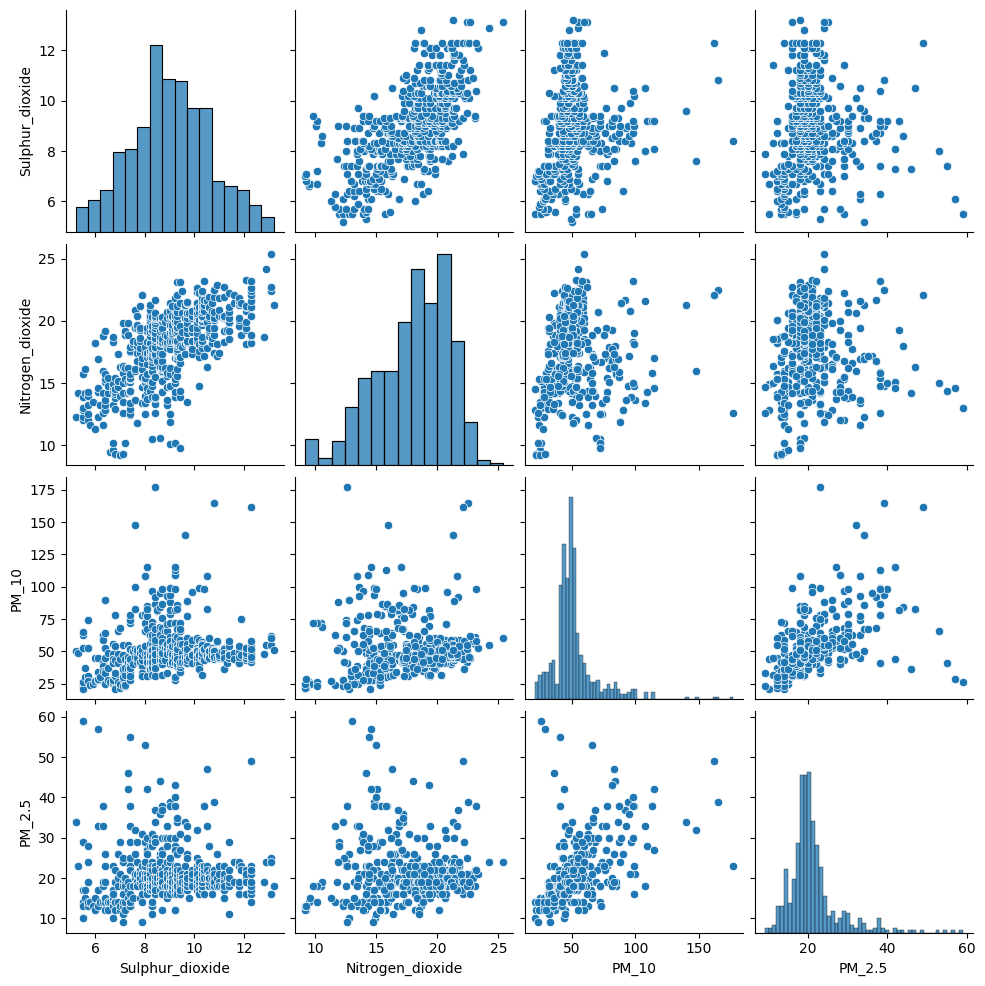

In [ ]:
sns.pairplot(Adyar_Pol)

<Axes: >

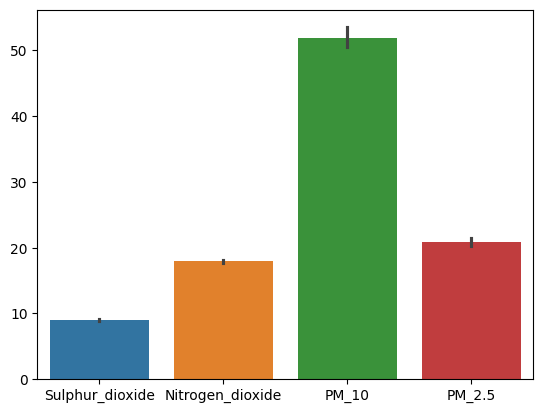

In [ ]:
sns.barplot(data=Adyar_Pol)

In [ ]:
Adyar2=Adyar.drop(columns="Stations")
Adyar2
Adyar2=Adyar2.drop(columns="Station Type")
Adyar2
Adyar2=Adyar2.drop(columns="index")
Adyar2=Adyar2.set_index("Date")
Adyar2.resample(rule="YE").mean()

,Sulphur_dioxide,Nitrogen_dioxide,PM_10,PM_2.5,AQI
Date,,,,,
2018-12-31,7.738961,14.731169,64.935065,23.194805,67.441558
2019-12-31,8.392958,16.559155,70.718310,27.929577,71.352113
2020-12-31,8.378495,17.086022,42.096774,19.247312,42.301075
2021-12-31,9.558065,19.248387,46.247312,19.311828,46.376344
2022-12-31,9.933663,19.942574,48.623762,20.188119,48.623762
2023-12-31,9.445455,19.264646,50.000000,19.626263,49.787879


In [ ]:
Thiyagaraya_Nagar.isnull().sum()

Date                 0
Sulphur_dioxide      0
Nitrogen_dioxide     0
PM_10                0
PM_2.5              37
AQI                  0
Stations             0
Station Type         0
dtype: int64